In [1]:
import os
import random
import tqdm
import pickle
import pandas as pd

import nltk
from nltk import ngrams
from collections import Counter

from IPython.display import Image

In [2]:
pathTrain = "./sentence-completion/Holmes_Training_Data/"
pathTest  = "/sentence-completion/"

### 1. Cleansing narasi novel

In [19]:
bigText = []
for item in tqdm.tqdm(os.listdir(pathTrain)):
    with open(pathTrain+item) as f:
        text  = f.read()
        text  = " ".join(data.splitlines())
        idEnd = text.rfind("*END*")
        newText = text[idEnd+5:]
        bigText.append(newText)


100%|████████████████████████████████████████████████████████████████████████████████| 522/522 [00:15<00:00, 32.70it/s]


In [20]:
# dump all text clean-narasi
with open('pkl/bigText.pkl', 'wb') as f:
    pickle.dump([" ".join(bigText)], f)

# load pickle
with open('pkl/bigText.pkl', 'rb') as f:
    bigText = pickle.load(f)

### 2. Buat bigram, trigram

In [30]:
allText = " ".join(bigText)

# unigram
n = 1
unigram = list(ngrams(allText.split(), n))

# bigram
n = 2
bigram = list(ngrams(allText.split(), n))

# trigram
n = 3
trigram = list(ngrams(allText.split(), n))


In [45]:
" ".join([item[0] for item in unigram[250:261]])

'stars of the American hemisphere. The settling of this region well'

In [41]:
bigram[250:260]

[('stars', 'of'),
 ('of', 'the'),
 ('the', 'American'),
 ('American', 'hemisphere.'),
 ('hemisphere.', 'The'),
 ('The', 'settling'),
 ('settling', 'of'),
 ('of', 'this'),
 ('this', 'region'),
 ('region', 'well')]

In [42]:
trigram[250:260]

[('stars', 'of', 'the'),
 ('of', 'the', 'American'),
 ('the', 'American', 'hemisphere.'),
 ('American', 'hemisphere.', 'The'),
 ('hemisphere.', 'The', 'settling'),
 ('The', 'settling', 'of'),
 ('settling', 'of', 'this'),
 ('of', 'this', 'region'),
 ('this', 'region', 'well'),
 ('region', 'well', 'deserves')]

### 3. Count freq

In [34]:
countUnigram = Counter(unigram)
countBigram  = Counter(bigram)
countTrigram = Counter(trigram)

# dump freq n-gram
with open('pkl/countUnigram.pkl', 'wb') as f:
    pickle.dump(countUnigram, f)
with open('pkl/countBigram.pkl', 'wb') as f:
    pickle.dump(countBigram, f)
with open('pkl/countTrigram.pkl', 'wb') as f:
    pickle.dump(countTrigram, f)

In [51]:
countBigram

Counter({('Etext', 'created'): 522,
         ('created', 'by'): 522,
         ('by', 'John'): 1044,
         ('John', 'M.'): 522,
         ('M.', 'Krafft'): 522,
         ('Krafft', 'krafftjm@muohio.edu'): 522,
         ('krafftjm@muohio.edu', 'From'): 522,
         ('From', 'The'): 522,
         ('The', 'Discovery'): 522,
         ('Discovery', 'and'): 522,
         ('and', 'Settlement'): 522,
         ('Settlement', 'of'): 522,
         ('of', 'Kentucke'): 2088,
         ('Kentucke', 'by'): 522,
         ('John', 'Filson'): 522,
         ('Filson', 'The'): 522,
         ('The', 'ADVENTURES'): 522,
         ('ADVENTURES', 'of'): 522,
         ('of', 'Col.'): 2088,
         ('Col.', 'DANIEL'): 522,
         ('DANIEL', 'BOON;'): 522,
         ('BOON;', 'containing'): 522,
         ('containing', 'a'): 522,
         ('a', 'NARRATIVE'): 522,
         ('NARRATIVE', 'of'): 522,
         ('of', 'the'): 30798,
         ('the', 'WARS'): 522,
         ('WARS', 'of'): 522,
         ('of', 'Kentu

In [52]:
countTrigram

Counter({('Etext', 'created', 'by'): 522,
         ('created', 'by', 'John'): 522,
         ('by', 'John', 'M.'): 522,
         ('John', 'M.', 'Krafft'): 522,
         ('M.', 'Krafft', 'krafftjm@muohio.edu'): 522,
         ('Krafft', 'krafftjm@muohio.edu', 'From'): 522,
         ('krafftjm@muohio.edu', 'From', 'The'): 522,
         ('From', 'The', 'Discovery'): 522,
         ('The', 'Discovery', 'and'): 522,
         ('Discovery', 'and', 'Settlement'): 522,
         ('and', 'Settlement', 'of'): 522,
         ('Settlement', 'of', 'Kentucke'): 522,
         ('of', 'Kentucke', 'by'): 522,
         ('Kentucke', 'by', 'John'): 522,
         ('by', 'John', 'Filson'): 522,
         ('John', 'Filson', 'The'): 522,
         ('Filson', 'The', 'ADVENTURES'): 522,
         ('The', 'ADVENTURES', 'of'): 522,
         ('ADVENTURES', 'of', 'Col.'): 522,
         ('of', 'Col.', 'DANIEL'): 522,
         ('Col.', 'DANIEL', 'BOON;'): 522,
         ('DANIEL', 'BOON;', 'containing'): 522,
         ('BOON;',

### Load n-gram, estimate n-gram prob

In [2]:
# load pickle
with open('pkl/countUnigram.pkl', 'rb') as f:
    countUnigram = pickle.load(f)
    
with open('pkl/countBigram.pkl', 'rb') as f:
    countBigram = pickle.load(f)
    
with open('pkl/countTrigram.pkl', 'rb') as f:
    countTrigram = pickle.load(f)

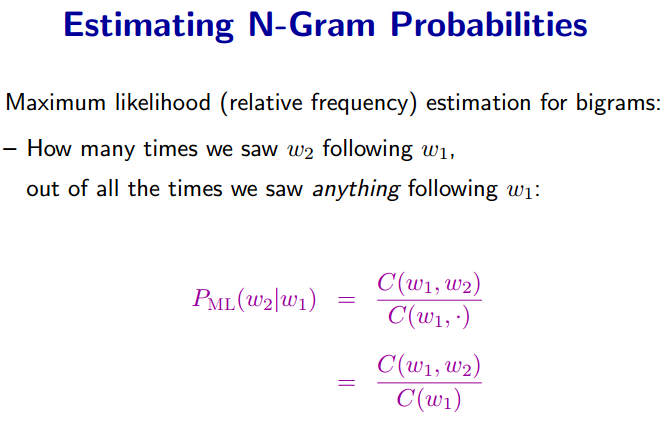

In [13]:
Image("img/estimate brigram.png")

In [61]:
def bigramEstimate(word1,word2):
    """
    dict count yg digunakan countUnigram dan countBigram.
    word1 = word pertama/ yg depan
    word2 = word kedua/ yg belakang
    """
    atas = countBigram[word1,word2]
    bawah = countUnigram[word1,]
    if atas == 0:
        return 0
    else:
        return atas/bawah


In [62]:
bigramEstimate('by','John')

0.0392156862745098

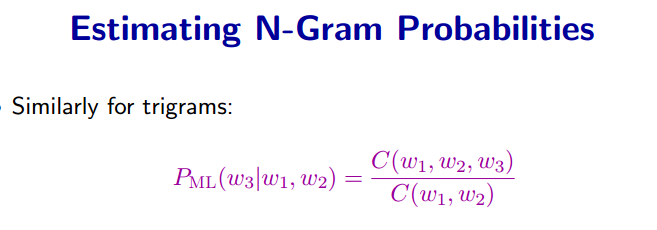

In [63]:
Image('img/estimate trigram.png')

In [65]:
def trigramEstimate(word1,word2,word3):
    """
    dict count yg digunakan countBigram dan countTrigram.
    word1 = word pertama/ yg depan
    word2 = word kedua/ yg tengah
    word3 = word ketiga/ terakhir
    """
    atas = countTrigram[word1,word2,word3]
    bawah = countBigram[word1,word2]
    if atas == 0:
        return 0
    else:
        return atas/bawah

In [66]:
trigramEstimate('in', 'the', 'midst')

0.07317073170731707

### Testing

In [67]:
testdata = pd.read_csv(pathTest+"testing_data.csv", index_col=0)
testdata.tail()

question          a)  \
id                                                                    
1036  The bedrooms in this _____ are on the ground f...        wing   
1037  Our visitor bore every mark of being an averag...       blind   
1038  The terror of his face lay in his eyes , howev...     cruelty   
1039  It is your commonplace , _____ crimes which ar...  underlying   
1040  On the last occasion he had _____ that if my f...    believed   

               b)           c)          d)             e)  
id                                                         
1036        coach      balcony     kingdom  neighbourhood  
1037    energetic     eloquent     pompous   sandy-haired  
1038    novitiate      justice      broker        success  
1039  featureless  theological  flattering     inevitable  
1040       proved   discovered    remarked        dreamed

### contoh posisi blank word dan penyusunan ngram dari test

In [68]:
askedWord = "_____"

In [69]:
print(testdata["question"][1].split())

['I', 'have', 'it', 'from', 'the', 'same', 'source', 'that', 'you', 'are', 'both', 'an', 'orphan', 'and', 'a', 'bachelor', 'and', 'are', '_____', 'alone', 'in', 'London.']


In [70]:
testdata["question"][1].split().index(askedWord)

18

In [148]:
# 2 kata blank belakang
print(testdata["question"][1].split()[17:19])

# 2 kata blank depan
print(testdata["question"][1].split()[18:20])

['are', '_____']
['_____', 'alone']


In [92]:
# 3 kata blank belakang
print(testdata["question"][1].split()[16:19])

# 3 kata blank tengah
print(testdata["question"][1].split()[17:20])

# 3 kata blank depan
print(testdata["question"][1].split()[18:21])

['and', 'are', '_____']
['are', '_____', 'alone']
['_____', 'alone', 'in']


### Run Trigram

In [123]:
def maintrigram():
    listMaxProb = []
    listAns = []
    
    idTest = list(testdata.index)
    idJawaban = ["a)","b)","c)","d)","e)"]
    for idt in tqdm.tqdm(idTest):
        soalWords = testdata['question'][idt].split()
        idBlank = soalWords.index("_____")
        
        maxProb = 0
        maxProbAns = 0
        for jawab in idJawaban:
            # prob trigram jawaban di akhir
            if idBlank >= 2:
                candidate = [soalWords[idBlank-2],soalWords[idBlank-1],testdata[jawab][idt]]
#                 print(candidate)
                probDepan = trigramEstimate(soalWords[idBlank-2],soalWords[idBlank-1],testdata[jawab][idt])
            else: probDepan = 0
            
            # prob trigram jawaban di tengah
            if (len(soalWords) - (idBlank+1)) >= 1 and idBlank >= 1:
                probTengah = trigramEstimate(soalWords[idBlank-1],testdata[jawab][idt],soalWords[idBlank+1])
            else: probTengah = 0
            
                
            # prob trigram jawaban di depan
            if len(soalWords)-(idBlank+1) >= 2:
                probBelakang = trigramEstimate(testdata[jawab][idt],soalWords[idBlank+1],soalWords[idBlank+2])
            else: probBelakang = 0

            # prob akhir
            nowProb = probDepan + probTengah + probBelakang
            
            if maxProb < nowProb:
                maxProb = nowProb
                maxProbAns = jawab.replace(")","")
                
        if maxProb == 0:
            maxProbAns = random.choice(idJawaban).replace(")","")
            
        listMaxProb.append(maxProb)
        listAns.append(maxProbAns)
        
        dictpd = {"id": idTest,
                  "answer": listAns,
                  "prob": listMaxProb}
        
    return pd.DataFrame.from_dict(dictpd).set_index('id') 

In [122]:
dfResultTri = maintrigram()
print(dfResultTri)

  0%|                                                                                         | 0/1040 [00:00<?, ?it/s]

['and', 'are', 'crying']
['and', 'are', 'instantaneously']
['and', 'are', 'residing']
['and', 'are', 'matched']
['and', 'are', 'walking']
['flowers', 'arranged', 'daintily']
['flowers', 'arranged', 'privately']
['flowers', 'arranged', 'inadvertently']
['flowers', 'arranged', 'miserably']
['flowers', 'arranged', 'comfortably']
[',', 'the', 'gods']
[',', 'the', 'moon']
[',', 'the', 'panther']
[',', 'the', 'guard']
[',', 'the', 'country-dance']
['off', ',', 'rubbing']
['off', ',', 'doubling']
['off', ',', 'paid']
['off', ',', 'naming']
['off', ',', 'carrying']
['hand', 'a', 'supply']
['hand', 'a', 'parcel']
['hand', 'a', 'sign']
['hand', 'a', 'sheet']
['hand', 'a', 'chorus']
['with', 'his', 'balloon']
['with', 'his', 'stick']
['with', 'his', 'niece']
['with', 'his', 'beard']
['with', 'his', 'suit']
['is', 'no', 'understanding']
['is', 'no', 'communication']
['is', 'no', 'difference']
['is', 'no', 'intrigue']
['is', 'no', 'issue']
['between', 'the', 'funniest']
['between', 'the', 'speedy']

  1%|▌                                                                                | 8/1040 [00:00<00:13, 75.51it/s]

['a', 'little', 'taller']
['a', 'little', 'farmhouse']
['a', 'little', 'curious']
['a', 'little', 'brook']
['a', 'little', 'pale']
['sat', 'waiting', 'silently']
['sat', 'waiting', 'intermittently']
['sat', 'waiting', 'unconsciously']
['sat', 'waiting', 'knowingly']
['sat', 'waiting', 'elsewhere']
['hand', 'and', 'telephoned']
['hand', 'and', 'begged']
['hand', 'and', 'kissed']
['hand', 'and', 'helped']
['hand', 'and', 'robbed']
['few', 'faint', 'tragedies']
['few', 'faint', 'stars']
['few', 'faint', 'rumours']
['few', 'faint', 'noises']
['few', 'faint', 'explanations']
['is', 'a', 'venerable']
['is', 'a', 'delicate']
['is', 'a', 'glorious']
['is', 'a', 'clever']
['is', 'a', 'sweet']
['came', 'three', 'batters']
['came', 'three', 'cheers']
['came', 'three', 'centuries']
['came', 'three', 'fiddlers']
['came', 'three', 'chimes']
['an', 'enthusiastic', 'cobbler']
['an', 'enthusiastic', 'advocate']
['an', 'enthusiastic', 'musician']
['an', 'enthusiastic', 'cow']
['an', 'enthusiastic', 'hig

  2%|█▏                                                                              | 16/1040 [00:00<00:13, 75.51it/s]

['specialist', 'was', 'unable']
['specialist', 'was', 'accustomed']
['specialist', 'was', 'beginning']
['specialist', 'was', 'forced']
['specialist', 'was', 'anxious']
['for', 'he', 'sprang']
['for', 'he', 'dared']
['for', 'he', 'resigned']
['for', 'he', 'sought']
['for', 'he', 'stooped']
['with', 'the', 'Moonstone']
['with', 'the', 'moonlight']
['with', 'the', 'empire']
['with', 'the', 'asylum']
['with', 'the', 'Inspector']
['the', 'solitary', 'confinement']
['the', 'solitary', 'meditation']
['the', 'solitary', 'watcher']
['the', 'solitary', 'carriers']
['the', 'solitary', 'island']
[',', 'a', 'worn-out']
[',', 'a', 'weak']
[',', 'a', 'mere']
[',', 'a', 'hoarse']
[',', 'a', 'wholesome']
['he', 'has', 'suffered']
['he', 'has', 'touched']
['he', 'has', 'taught']
['he', 'has', 'forgotten']
['he', 'has', 'eaten']
['imagine', 'my', 'virtue']
['imagine', 'my', 'seamanship']
['imagine', 'my', 'occupation']
['imagine', 'my', 'exultation']
['imagine', 'my', 'ankles']
['me', 'my', 'entrance']
[

  2%|█▊                                                                              | 24/1040 [00:00<00:13, 73.84it/s]

['loved', 'the', 'porch']
['loved', 'the', 'wayside']
['loved', 'the', 'yam']
['loved', 'the', 'butler']
['loved', 'the', 'automobiles']
['at', 'the', 'whelps']
['at', 'the', 'knocker']
['at', 'the', 'barn']
['at', 'the', 'tumult']
['at', 'the', 'vegetables']
['I', 'could', 'regularly']
['I', 'could', 'darkly']
['I', 'could', 'scarcely']
['I', 'could', 'distinctly']
['I', 'could', 'possibly']
['with', 'the', 'mystic']
['with', 'the', 'inevitable']
['with', 'the', 'police']
['with', 'the', 'customary']
['with', 'the', 'dreary']
['as', 'I', 'leaned']
['as', 'I', 'glanced']
['as', 'I', 'crawled']
['as', 'I', 'stepped']
['as', 'I', 'rode']
['his', 'own', 'downfall']
['his', 'own', 'abilities']
['his', 'own', 'symptoms']
['his', 'own', 'chamber']
['his', 'own', 'government']
['was', 'a', 'commonplace']
['was', 'a', 'confirmed']
['was', 'a', 'lovely']
['was', 'a', 'formidable']
['was', 'a', 'younger']
['his', 'own', 'hypothesis']
['his', 'own', 'misfortunes']
['his', 'own', 'opinion']
['his'

  3%|██▌                                                                             | 33/1040 [00:00<00:13, 76.86it/s]

['screamed', 'and', 'shrunk']
['screamed', 'and', 'marched']
['screamed', 'and', 'hissed']
['screamed', 'and', 'breathed']
['screamed', 'and', 'supported']
['used', 'by', 'valor']
['used', 'by', 'universities']
['used', 'by', 'bedsteads']
['used', 'by', 'degrees']
['used', 'by', 'servants']
['he', 'our', 'consecrated']
['he', 'our', 'pedantic']
['he', 'our', 'malignant']
['he', 'our', 'cheerful']
['he', 'our', 'splendid']
['vague', 'outline', 'wandered']
['vague', 'outline', 'backed']
['vague', 'outline', 'separated']
['vague', 'outline', 'hardened']
['vague', 'outline', 'folded']
['sheet', 'of', 'defiance']
['sheet', 'of', 'varnish']
['sheet', 'of', 'tissue-paper']
['sheet', 'of', 'iron']
['sheet', 'of', 'carpet']
['I', 'carefully', 'brushed']
['I', 'carefully', 'stripped']
['I', 'carefully', 'wiped']
['I', 'carefully', 'shut']
['I', 'carefully', 'paced']
[',', 'Holmes', 'sprang']
[',', 'Holmes', 'mellowed']
[',', 'Holmes', 'floated']
[',', 'Holmes', 'swelled']
[',', 'Holmes', 'disapp

  4%|███▏                                                                            | 42/1040 [00:00<00:12, 78.91it/s]

['know', 'the', 'hopelessness']
['know', 'the', 'correspondence']
['know', 'the', 'astonishment']
['know', 'the', 'spell']
['know', 'the', 'steps']
['you', 'may', 'remain']
['you', 'may', 'ride']
['you', 'may', 'throb']
['you', 'may', 'step']
['you', 'may', 'billow']
['one', 'may', 'prove']
['one', 'may', 'choose']
['one', 'may', 'learn']
['one', 'may', 'forget']
['one', 'may', 'succumb']
['raised', 'the', 'cup']
['raised', 'the', 'note']
['raised', 'the', 'sleepers']
['raised', 'the', 'forester']
['raised', 'the', 'fugitive']
['details', 'have', 'located']
['details', 'have', 'encumbered']
['details', 'have', 'traversed']
['details', 'have', 'drawn']
['details', 'have', 'contained']
['received', 'an', 'arrangement']
['received', 'an', 'affliction']
['received', 'an', 'invitation']
['received', 'an', 'entanglement']
['received', 'an', 'explanation']
[',', 'all', 'pale']
[',', 'all', 'dirty']
[',', 'all', 'safe']
[',', 'all', 'blood-stained']
[',', 'all', 'crooked']


  5%|███▊                                                                            | 49/1040 [00:00<00:17, 57.21it/s]

['actually', 'sat', 'adrift']
['actually', 'sat', 'smiling']
['actually', 'sat', 'comfortably']
['actually', 'sat', 'crying']
['actually', 'sat', 'sewing']
['you', 'were', 'terrifying']
['you', 'were', 'running']
['you', 'were', 'written']
['you', 'were', 'likely']
['you', 'were', 'attached']
['arteries', 'which', 'supported']
['arteries', 'which', 'surrounded']
['arteries', 'which', 'sheltered']
['arteries', 'which', 'conveyed']
['arteries', 'which', 'contained']
['take', 'the', 'oath']
['take', 'the', 'message']
['take', 'the', 'blame']
['take', 'the', 'shirt']
['take', 'the', 'shadows']
['dark', ',', 'rosy']
['dark', ',', 'childish']
['dark', ',', 'fearsome']
['dark', ',', 'colorless']
['dark', ',', 'yellow']
['fat', 'man', 'cast']
['fat', 'man', 'folded']
['fat', 'man', 'hastened']
['fat', 'man', 'jingled']
['fat', 'man', 'winked']
['stair', ',', 'devoured']
['stair', ',', 'translated']
['stair', ',', 'unlocked']
['stair', ',', 'ascended']
['stair', ',', 'occupied']
['moment', 'as'

  6%|████▍                                                                           | 58/1040 [00:00<00:15, 62.89it/s]

['his', 'hat', 'closed']
['his', 'hat', 'slouched']
['his', 'hat', 'wheeled']
['his', 'hat', 'pulled']
['his', 'hat', 'blown']
['to', 'make', 'progress']
['to', 'make', 'matters']
['to', 'make', 'merry']
['to', 'make', 'advances']
['to', 'make', 'rules']
['I', 'have', 'determined']
['I', 'have', 'related']
['I', 'have', 'overheard']
['I', 'have', 'absconded']
['I', 'have', 'noticed']
['in', 'the', 'battle']
['in', 'the', 'chamber']
['in', 'the', 'incubator']
['in', 'the', 'shadow']
['in', 'the', 'spring']
['A', 'low', 'courtship']
['A', 'low', 'struggle']
['A', 'low', 'blow']
['A', 'low', 'shrub']
['A', 'low', 'moan']
['as', 'I', 'sailed']
['as', 'I', 'smiled']
['as', 'I', 'drove']
['as', 'I', 'shrunk']
['as', 'I', 'flowed']
['but', 'we', 'behold']
['but', 'we', 'realised']
['but', 'we', 'provide']
['but', 'we', 'lose']
['but', 'we', 'owe']
['hope', 'to', 'heaven']
['hope', 'to', 'explain']
['hope', 'to', 'argue']
['hope', 'to', 'inhabit']
['hope', 'to', 'demand']
['in', 'the', 'shadow

  6%|█████▏                                                                          | 67/1040 [00:00<00:14, 68.21it/s]

['Perhaps', 'our', 'gate']
['Perhaps', 'our', 'weather']
['Perhaps', 'our', 'visit']
['Perhaps', 'our', 'limbs']
['Perhaps', 'our', 'skirts']
['that', 'the', 'garret']
['that', 'the', 'saints']
['that', 'the', 'dog']
['that', 'the', 'coroner']
['that', 'the', 'birds']
['and', 'the', 'affair']
['and', 'the', 'devil']
['and', 'the', 'snow']
['and', 'the', 'challenge']
['and', 'the', 'illusion']
['Then', 'he', 'vanished']
['Then', 'he', 'bent']
['Then', 'he', 'leant']
['Then', 'he', 'wept']
['Then', 'he', 'hovered']
['Not', 'a', 'scoundrel']
['Not', 'a', 'muddle']
['Not', 'a', 'soldier']
['Not', 'a', 'whim']
['Not', 'a', 'whisper']
['fear', 'to', 'pawn']
['fear', 'to', 'contradict']
['fear', 'to', 'invoke']
['fear', 'to', 'store']
['fear', 'to', 'subdue']
['upon', 'a', 'keg']
['upon', 'a', 'sword']
['upon', 'a', 'farm']
['upon', 'a', 'fly']
['upon', 'a', 'needle']
['to', 'make', 'songs']
['to', 'make', 'pleasantries']
['to', 'make', 'mistakes']
['to', 'make', 'stories']
['to', 'make', 'in

  7%|█████▊                                                                          | 75/1040 [00:01<00:18, 50.94it/s]

['tell', 'what', 'sport']
['tell', 'what', 'indirect']
['tell', 'what', 'handsome']
['tell', 'what', 'imprudence']
['tell', 'what', 'comfort']
['almost', 'as', 'formidable']
['almost', 'as', 'loud']
['almost', 'as', 'quick']
['almost', 'as', 'tall']
['almost', 'as', 'invisible']
['of', 'the', 'forest']
['of', 'the', 'parties']
['of', 'the', 'victory']
['of', 'the', 'stairs']
['of', 'the', 'mills']
['the', 'criminal', 'courage']
['the', 'criminal', 'peace']
['the', 'criminal', 'news']
['the', 'criminal', 'nuts']
['the', 'criminal', 'plans']
['they', 'quite', 'visited']
['they', 'quite', 'enjoyed']
['they', 'quite', 'lightened']
['they', 'quite', 'emptied']
['they', 'quite', 'surpass']
['a', 'police-station', 'lying']
['a', 'police-station', 'rolling']
['a', 'police-station', 'gathered']
['a', 'police-station', 'anywhere']
['a', 'police-station', "comin'"]
['seen', 'so', 'accurate']
['seen', 'so', 'numerous']
['seen', 'so', 'thin']
['seen', 'so', 'provocative']
['seen', 'so', 'marked']
[

  8%|██████▍                                                                         | 84/1040 [00:01<00:16, 57.23it/s]

['tried', 'to', 'recommend']
['tried', 'to', 'fling']
['tried', 'to', 'accomplish']
['tried', 'to', 'reconstruct']
['tried', 'to', 'carry']
['to', 'have', 'killed']
['to', 'have', 'convinced']
['to', 'have', 'practised']
['to', 'have', 'expected']
['to', 'have', 'interrupted']
['were', 'the', 'signatures']
['were', 'the', 'relics']
['were', 'the', 'hearts']
['were', 'the', 'anxieties']
['were', 'the', 'portraits']
['companion', 'noiselessly', 'toed']
['companion', 'noiselessly', 'awaited']
['companion', 'noiselessly', 'grasped']
['companion', 'noiselessly', 'closed']
['companion', 'noiselessly', 'mounted']
['darkness', 'was', 'rising']
['darkness', 'was', 'healed']
['darkness', 'was', 'ponderous']
['darkness', 'was', 'neglected']
['darkness', 'was', 'attractive']
['at', 'the', 'mistake']
['at', 'the', 'porch']
['at', 'the', 'fireplace']
['at', 'the', 'ceiling']
['at', 'the', 'pump']
['words', 'were', 'arrested']
['words', 'were', 'startled']
['words', 'were', 'enriched']
['words', 'wer

  9%|███████                                                                         | 92/1040 [00:01<00:15, 61.71it/s]

['and', 'to', 'assure']
['and', 'to', 'detach']
['and', 'to', 'teach']
['and', 'to', 'dismiss']
['and', 'to', 'reproach']
['she', 'his', 'discomfiture']
['she', 'his', 'client']
['she', 'his', 'choice']
['she', 'his', 'musings']
['she', 'his', 'opportunity']
['heard', 'the', 'image']
['heard', 'the', 'clatter']
['heard', 'the', 'baying']
['heard', 'the', 'tinkle']
['heard', 'the', 'click']
['certainly', 'be', 'incomplete']
['certainly', 'be', 'considered']
['certainly', 'be', 'audible']
['certainly', 'be', 'discovered']
['certainly', 'be', 'disembowelled']
['crinkled', 'and', 'chattering']
['crinkled', 'and', 'picturesque']
['crinkled', 'and', 'hopeful']
['crinkled', 'and', 'puckered']
['crinkled', 'and', 'glistening']
['Inspector', 'had', 'detected']
['Inspector', 'had', 'baked']
['Inspector', 'had', 'touched']
['Inspector', 'had', 'rendered']
['Inspector', 'had', 'overlooked']
['turning', 'the', 'lamp']
['turning', 'the', 'fish']
['turning', 'the', 'lock']
['turning', 'the', 'bucket'

 10%|███████▌                                                                        | 99/1040 [00:01<00:21, 43.09it/s]

['My', 'heart', 'cruised']
['My', 'heart', 'lies']
['My', 'heart', 'lingered']
['My', 'heart', 'leaped']
['My', 'heart', 'struggled']
['my', 'case', 'moaning']
['my', 'case', 'arose']
['my', 'case', 'complete']
['my', 'case', 'tonight']
['my', 'case', 'mechanically']
['and', ',', 'pulling']
['and', ',', 'cautioning']
['and', ',', 'addressing']
['and', ',', 'touching']
['and', ',', 'approaching']
['that', 'the', 'trail']
['that', 'the', 'descendants']
['that', 'the', 'rectitude']
['that', 'the', 'outburst']
['that', 'the', 'destruction']
['afterwards', 'the', 'angry']
['afterwards', 'the', 'sitting-room']
['afterwards', 'the', 'typical']
['afterwards', 'the', 'monotonous']
['afterwards', 'the', 'ironic']
['out', ',', 'muttering']
['out', ',', 'marvelling']
['out', ',', 'calling']
['out', ',', 'sighing']
['out', ',', 'fluttering']
['saw', 'him', 'neglect']
['saw', 'him', 'strike']
['saw', 'him', 'cross']
['saw', 'him', 'adjust']
['saw', 'him', 'grasp']
['a', 'soft', 'juicy']
['a', 'soft'

 10%|████████▏                                                                      | 107/1040 [00:01<00:18, 49.37it/s]

['one', 'person', 'fainted']
['one', 'person', 'delivered']
['one', 'person', 'stayed']
['one', 'person', 'knocked']
['one', 'person', 'snarled']
['of', 'it', 'delighted']
['of', 'it', 'ends']
['of', 'it', 'recalled']
['of', 'it', 'fled']
['of', 'it', 'arrived']
['upon', 'the', 'sidewalk']
['upon', 'the', 'cloth']
['upon', 'the', 'landing']
['upon', 'the', 'bench']
['upon', 'the', 'mountain']
['Then', 'he', 'mopped']
['Then', 'he', 'reseated']
['Then', 'he', 'lashed']
['Then', 'he', 'shut']
['Then', 'he', 'committed']
['him', 'and', 'creaked']
['him', 'and', 'withered']
['him', 'and', 'reigned']
['him', 'and', 'failed']
['him', 'and', 'fought']
['be', 'a', 'penitent']
['be', 'a', 'revolution']
['be', 'a', 'peasant']
['be', 'a', 'queen']
['be', 'a', 'relation']
['only', 'two', 'chairs']
['only', 'two', 'logs']
['only', 'two', 'voices']
['only', 'two', 'foxes']
['only', 'two', 'decanters']
['and', 'the', 'prisoner']
['and', 'the', 'actions']
['and', 'the', 'holiday']
['and', 'the', 'laws

 11%|████████▊                                                                      | 116/1040 [00:01<00:16, 56.04it/s]

['You', 'must', 'contradict']
['You', 'must', 'persuade']
['You', 'must', 'cover']
['You', 'must', 'lock']
['You', 'must', 'judge']
['brought', 'a', 'variety']
['brought', 'a', 'gush']
['brought', 'a', 'bunch']
['brought', 'a', 'pair']
['brought', 'a', 'branch']
['Mortimer', 'had', 'stayed']
['Mortimer', 'had', 'submitted']
['Mortimer', 'had', 'sunk']
['Mortimer', 'had', 'risen']
['Mortimer', 'had', 'spoken']
['long', 'thin', 'hedge']
['long', 'thin', 'cane']
['long', 'thin', 'dilemma']
['long', 'thin', 'nose']
['long', 'thin', 'pickle']
['know', 'how', 'determined']
['know', 'how', 'superstitious']
['know', 'how', 'insignificant']
['know', 'how', 'violent']
['know', 'how', 'subtle']
['a', 'fine', 'estate']
['a', 'fine', 'actor']
['a', 'fine', 'horseman']
['a', 'fine', 'hunter']
['a', 'fine', 'linguist']
['has', 'been', 'slain']
['has', 'been', 'published']
['has', 'been', 'packed']
['has', 'been', 'sunk']
['has', 'been', 'burnt']


 12%|█████████▎                                                                     | 123/1040 [00:02<00:21, 42.71it/s]

['which', 'Holmes', 'thrust']
['which', 'Holmes', 'leaned']
['which', 'Holmes', 'removed']
['which', 'Holmes', 'tossed']
['which', 'Holmes', 'nodded']
['time', 'to', 'overtake']
['time', 'to', 'cultivate']
['time', 'to', 'reunite']
['time', 'to', 'analyse']
['time', 'to', 'deluge']
['which', 'would', 'teach']
['which', 'would', 'join']
['which', 'would', 'disqualify']
['which', 'would', 'hinder']
['which', 'would', 'mock']
['more', 'than', 'satisfied']
['more', 'than', 'thankful']
['more', 'than', 'forty']
['more', 'than', 'thirteen']
['more', 'than', 'likely']
['is', 'still', 'prevalent']
['is', 'still', 'warm']
['is', 'still', 'loud']
['is', 'still', 'lying']
['is', 'still', 'believed']
['always', 'been', 'transported']
['always', 'been', 'hanging']
['always', 'been', 'deposited']
['always', 'been', 'proud']
['always', 'been', 'drawn']
['as', 'an', 'Elephant']
['as', 'an', 'actress']
['as', 'an', 'excuse']
['as', 'an', 'aeroplane']
['as', 'an', 'exercise']
['kindness', 'to', 'outlast

 13%|██████████                                                                     | 132/1040 [00:02<00:18, 49.78it/s]

['same', 'crowded', 'creek']
['same', 'crowded', 'sepulchre']
['same', 'crowded', 'thoroughfare']
['same', 'crowded', 'clergy']
['same', 'crowded', 'theatres']
['of', 'my', 'misfortune']
['of', 'my', 'luck']
['of', 'my', 'punishment']
['of', 'my', 'revolver']
['of', 'my', 'salvation']
['had', 'three', 'crackers']
['had', 'three', 'fishes']
['had', 'three', 'jackets']
['had', 'three', 'cheers']
['had', 'three', 'consultations']
['could', 'not', 'swallow']
['could', 'not', 'imagine']
['could', 'not', 'worry']
['could', 'not', 'exclaim']
['could', 'not', 'move']
['was', 'a', 'baby']
['was', 'a', 'madman']
['was', 'a', 'picnic']
['was', 'a', 'stranger']
['was', 'a', 'visitor']
['that', 'by', 'torture']
['that', 'by', 'sunset']
['that', 'by', 'excavation']
['that', 'by', 'pondering']
['that', 'by', 'economy']
['even', 'more', 'numerous']
['even', 'more', 'unprofitable']
['even', 'more', 'instructive']
['even', 'more', 'flurried']
['even', 'more', 'reassuring']
['from', 'a', 'groan']
['from'

 14%|██████████▋                                                                    | 141/1040 [00:02<00:15, 56.52it/s]

['of', 'her', 'denial']
['of', 'her', 'caste']
['of', 'her', 'misfortune']
['of', 'her', 'honour']
['of', 'her', 'unhappiness']
['see', 'a', 'drop']
['see', 'a', 'couple']
['see', 'a', 'crust']
['see', 'a', 'condensation']
['see', 'a', 'series']
['and', 'the', 'glory']
['and', 'the', 'fame']
['and', 'the', 'mystery']
['and', 'the', 'hammer']
['and', 'the', 'driveway']
[',', 'something', 'naked']
[',', 'something', 'substantial']
[',', 'something', 'egotistic']
[',', 'something', 'pitiable']
[',', 'something', 'mysterious']
['on', 'a', 'plain']
['on', 'a', 'professional']
['on', 'a', 'holiday']
['on', 'a', 'recognized']
['on', 'a', 'founded']
['He', 'was', 'educated']
['He', 'was', 'thin']
['He', 'was', 'calm']
['He', 'was', 'mumbling']
['He', 'was', 'clever']
['as', 'a', 'candle']
['as', 'a', 'knife']
['as', 'a', 'apron']
['as', 'a', 'bulldog']
['as', 'a', 'motor-car']


 14%|███████████▏                                                                   | 148/1040 [00:02<00:20, 43.06it/s]

['may', 'be', 'charmed']
['may', 'be', 'safe']
['may', 'be', 'forced']
['may', 'be', 'explained']
['may', 'be', 'defeated']
['have', 'been', 'misinformed']
['have', 'been', 'abroad']
['have', 'been', 'overheard']
['have', 'been', 'asleep']
['have', 'been', 'innocent']
['windows', 'were', 'pressed']
['windows', 'were', 'blocked']
['windows', 'were', 'accompanied']
['windows', 'were', 'united']
['windows', 'were', 'overcome']
['read', 'that', 'text']
['read', 'that', 'bacon']
['read', 'that', 'infantry']
['read', 'that', 'rope']
['read', 'that', 'tube']
['four', 'successive', 'heirs']
['four', 'successive', 'workers']
['four', 'successive', 'singers']
['four', 'successive', 'rebels']
['four', 'successive', 'prisoners']
['and', 'your', 'distress']
['and', 'your', 'bandage']
['and', 'your', 'innocence']
['and', 'your', 'permission']
['and', 'your', 'oaths']
['did', 'not', 'reappear']
['did', 'not', 'gain']
['did', 'not', 'cook']
['did', 'not', 'remain']
['did', 'not', 'begin']
['had', 'no'

 15%|███████████▊                                                                   | 156/1040 [00:02<00:17, 49.62it/s]

['in', 'a', 'monastery']
['in', 'a', 'drawing-room']
['in', 'a', 'knot']
['in', 'a', 'fortress']
['in', 'a', 'nest']
['saw', 'him', 'grinning']
['saw', 'him', 'lie']
['saw', 'him', 'travel']
['saw', 'him', 'motion']
['saw', 'him', 'sing']
['he', 'had', 'resumed']
['he', 'had', 'pawned']
['he', 'had', 'foreseen']
['he', 'had', 'mislaid']
['he', 'had', 'improved']
['when', 'he', 'hears']
['when', 'he', 'wakes']
['when', 'he', 'speaks']
['when', 'he', 'wishes']
['when', 'he', 'wrote']
['sweet', 'and', 'confused']
['sweet', 'and', 'opposite']
['sweet', 'and', 'wholesome']
['sweet', 'and', 'distressing']
['sweet', 'and', 'blinding']
['of', 'the', 'tower']
['of', 'the', 'torrent']
['of', 'the', 'lake']
['of', 'the', 'sheet']
['of', 'the', 'merchants']
['had', 'been', 'cleaned']
['had', 'been', 'banished']
['had', 'been', 'disturbed']
['had', 'been', 'lit']
['had', 'been', 'misinformed']
['paper', 'with', 'fog']
['paper', 'with', 'shame']
['paper', 'with', 'writing']
['paper', 'with', 'snow']

 16%|████████████▍                                                                  | 164/1040 [00:02<00:15, 55.54it/s]

['but', 'horribly', 'good-natured']
['but', 'horribly', 'mangled']
['but', 'horribly', 'well-spoken']
['but', 'horribly', 'intelligent']
['but', 'horribly', 'unchristian']
['it', 'which', 'befel']
['it', 'which', 'possesses']
['it', 'which', 'employs']
['it', 'which', 'fed']
['it', 'which', 'fascinates']
['was', 'a', 'first-class']
['was', 'a', 'dangerous']
['was', 'a', 'good-hearted']
['was', 'a', 'sensible']
['was', 'a', 'clever']
['to', 'a', 'lump']
['to', 'a', 'dash']
['to', 'a', 'bar']
['to', 'a', 'picture']
['to', 'a', 'piece']
['held', 'a', 'holiday']
['held', 'a', 'pistol']
['held', 'a', 'wolf']
['held', 'a', 'soldier']
['held', 'a', 'dressing-table']
['and', 'the', 'books']
['and', 'the', 'clerks']
['and', 'the', 'windows']
['and', 'the', 'meadows']
['and', 'the', 'novices']
['together', ',', 'filling']
['together', ',', 'retaining']
['together', ',', 'leaving']
['together', ',', 'watching']
['together', ',', 'arranging']


 16%|████████████▉                                                                  | 171/1040 [00:03<00:20, 43.06it/s]

['had', 'to', 'repeat']
['had', 'to', 'undo']
['had', 'to', 'steal']
['had', 'to', 'buy']
['had', 'to', 'invent']
['I', 'have', 'described']
['I', 'have', 'concluded']
['I', 'have', 'arrived']
['I', 'have', 'avoided']
['I', 'have', 'conceded']
['where', 'a', 'Canadian']
['where', 'a', 'breeze']
['where', 'a', 'creature']
['where', 'a', 'government']
['where', 'a', 'shepherd']
['light', 'which', 'ascended']
['light', 'which', 'goes']
['light', 'which', 'sprang']
['light', 'which', 'stooped']
['light', 'which', 'sufficed']
['I', 'must', 'draw']
['I', 'must', 'burn']
['I', 'must', 'strike']
['I', 'must', 'approach']
['I', 'must', 'remove']
['not', 'been', 'built']
['not', 'been', 'slain']
['not', 'been', 'invaluable']
['not', 'been', 'formed']
['not', 'been', 'fed']
['within', 'ten', 'seconds']
['within', 'ten', 'degrees']
['within', 'ten', 'grains']
['within', 'ten', 'drops']
['within', 'ten', 'conditions']
['and', 'two', 'pairs']
['and', 'two', 'books']
['and', 'two', 'bottles']
['and',

 17%|█████████████▋                                                                 | 180/1040 [00:03<00:17, 50.03it/s]

['you', 'would', 'slip']
['you', 'would', 'increase']
['you', 'would', 'pull']
['you', 'would', 'enlarge']
['you', 'would', 'appreciate']
['had', 'no', 'difficulty']
['had', 'no', 'hesitation']
['had', 'no', 'faith']
['had', 'no', 'scruple']
['had', 'no', 'luck']
['bent', 'and', 'wriggled']
['bent', 'and', 'twisted']
['bent', 'and', 'faded']
['bent', 'and', 'poured']
['bent', 'and', 'marched']
['King', 'is', 'minded']
['King', 'is', 'dying']
['King', 'is', 'devoid']
['King', 'is', 'pitiless']
['King', 'is', 'capable']
['of', 'the', 'cliffs']
['of', 'the', 'lengths']
['of', 'the', 'needle']
['of', 'the', 'eunuchs']
['of', 'the', 'newspaper']
['ends', 'those', 'violets']
['ends', 'those', 'losers']
['ends', 'those', 'barbarians']
['ends', 'those', 'powers']
['ends', 'those', 'loans']
['of', 'his', 'bedroom']
['of', 'his', 'reign']
['of', 'his', 'productions']
['of', 'his', 'danger']
['of', 'his', 'captivity']
['Then', 'it', 'flowed']
['Then', 'it', 'waded']
['Then', 'it', 'flashed']
['Th

 18%|██████████████▎                                                                | 188/1040 [00:03<00:15, 56.25it/s]

['as', 'we', 'trembled']
['as', 'we', 'slept']
['as', 'we', 'applauded']
['as', 'we', 'reeled']
['as', 'we', 'talked']
['was', 'a', 'mere']
['was', 'a', 'reckless']
['was', 'a', 'helpless']
['was', 'a', 'wonderfully']
['was', 'a', "woman's"]
['our', 'new', 'torments']
['our', 'new', 'acquaintance']
['our', 'new', 'moon']
['our', 'new', 'rage']
['our', 'new', 'dishes']
['be', 'a', 'message']
['be', 'a', 'pity']
['be', 'a', 'match']
['be', 'a', 'companion']
['be', 'a', 'triumph']
['without', 'the', 'outbreak']
['without', 'the', 'indifference']
['without', 'the', 'payment']
['without', 'the', 'authority']
['without', 'the', 'countenance']
['you', 'are', 'manufactured']
['you', 'are', 'interested']
['you', 'are', 'celebrated']
['you', 'are', 'equally']
['you', 'are', 'engaged']
['I', 'was', 'weary']
['I', 'was', 'aware']
['I', 'was', 'ignorant']
['I', 'was', 'conscious']
['I', 'was', 'independent']
['with', 'the', 'lazy']
['with', 'the', 'proudest']
['with', 'the', 'cocked']
['with', 'the

 19%|██████████████▉                                                                | 196/1040 [00:03<00:18, 45.14it/s]

['gave', 'a', 'trifle']
['gave', 'a', 'coward']
['gave', 'a', 'hurry']
['gave', 'a', 'kitchen']
['gave', 'a', 'rock']
['I', 'could', 'waste']
['I', 'could', 'follow']
['I', 'could', 'bury']
['I', 'could', 'lose']
['I', 'could', 'ensure']
['he', 'is', 'violent']
['he', 'is', 'petty']
['he', 'is', 'extraneous']
['he', 'is', 'nourishing']
['he', 'is', 'funny']
['she', 'was', 'born']
['she', 'was', 'dispatched']
['she', 'was', 'riding']
['she', 'was', 'praying']
['she', 'was', 'killed']
['of', 'my', 'neck']
['of', 'my', 'beauty']
['of', 'my', 'facts']
['of', 'my', 'pockets']
['of', 'my', 'folly']
[',', 'I', 'obeyed']
[',', 'I', 'shouted']
[',', 'I', 'repeat']
[',', 'I', 'gasped']
[',', 'I', 'argued']
['began', 'these', 'individuals']
['began', 'these', 'negotiations']
['began', 'these', 'outcasts']
['began', 'these', 'spurs']
['began', 'these', 'sentiments']
['the', 'legal', 'obstacles']
['the', 'legal', 'acuteness']
['the', 'legal', 'formalities']
['the', 'legal', 'disputes']
['the', 'leg

 20%|███████████████▌                                                               | 205/1040 [00:03<00:15, 52.53it/s]

['what', 'you', 'dry']
['what', 'you', 'refuse']
['what', 'you', 'earn']
['what', 'you', 'heed']
['what', 'you', 'infer']
['of', 'German', 'spies']
['of', 'German', 'arguments']
['of', 'German', 'apples']
['of', 'German', 'gilt']
['of', 'German', 'music']
['them', 'without', 'discussing']
['them', 'without', 'revealing']
['them', 'without', 'considering']
['them', 'without', 'hearing']
['them', 'without', 'telling']
['winding', 'stone', 'pitchers']
['winding', 'stone', 'flags']
['winding', 'stone', 'steps']
['winding', 'stone', 'edifice']
['winding', 'stone', 'balconies']
['a', 'thousand', 'worlds']
['a', 'thousand', 'obstacles']
['a', 'thousand', 'offerings']
['a', 'thousand', 'lives']
['a', 'thousand', 'duels']
['you', 'will', 'excuse']
['you', 'will', 'satisfy']
['you', 'will', 'blast']
['you', 'will', 'criticize']
['you', 'will', 'receive']
['Cartwright', 'was', 'discovered']
['Cartwright', 'was', 'ruffled']
['Cartwright', 'was', 'overhead']
['Cartwright', 'was', 'confused']
['Cart

 21%|████████████████▎                                                              | 214/1040 [00:03<00:14, 58.97it/s]

['two', 'small', 'wine']
['two', 'small', 'wicker-work']
['two', 'small', 'lighted']
['two', 'small', 'walking']
['two', 'small', 'massive']
['was', 'a', 'piece']
['was', 'a', 'thrill']
['was', 'a', 'trace']
['was', 'a', 'source']
['was', 'a', 'prospect']
['bed', 'and', 'hired']
['bed', 'and', 'ordered']
['bed', 'and', 'spent']
['bed', 'and', 'gathered']
['bed', 'and', 'offered']
['was', 'almost', 'mesmeric']
['was', 'almost', 'humdrum']
['was', 'almost', 'unfounded']
['was', 'almost', 'pedestrian']
['was', 'almost', 'deferential']
['had', 'the', 'privilege']
['had', 'the', 'aspect']
['had', 'the', 'indignation']
['had', 'the', 'magnitude']
['had', 'the', 'integrity']
['or', 'two', 'stations']
['or', 'two', 'matches']
['or', 'two', 'robberies']
['or', 'two', 'campaigns']
['or', 'two', 'questions']
['the', 'most', 'horrible']
['the', 'most', 'dangerous']
['the', 'most', 'degrading']
['the', 'most', 'preposterous']
['the', 'most', 'important']
['Left', 'his', 'defeat']
['Left', 'his', 'i

 21%|████████████████▊                                                              | 222/1040 [00:04<00:18, 44.64it/s]

['much', 'is', 'fairly']
['much', 'is', 'singing']
['much', 'is', 'falling']
['much', 'is', 'reared']
['much', 'is', 'setting']
['not', 'the', 'bark']
['not', 'the', 'aeroplane']
['not', 'the', 'comfort']
['not', 'the', 'energy']
['not', 'the', 'preference']
['was', 'so', 'bewildered']
['was', 'so', 'dumfounded']
['was', 'so', 'prearranged']
['was', 'so', 'astonished']
['was', 'so', 'intense']
['for', 'his', 'civility']
['for', 'his', 'bravery']
['for', 'his', 'weakness']
['for', 'his', 'kindness']
['for', 'his', 'benevolence']
['order', 'to', 'remonstrate']
['order', 'to', 'weep']
['order', 'to', 'harmonize']
['order', 'to', 'perish']
['order', 'to', 'negotiate']
['into', 'the', 'pocket']
['into', 'the', 'bosom']
['into', 'the', 'custody']
['into', 'the', 'middle']
['into', 'the', 'shade']
['came', 'away', 'baffled']
['came', 'away', 'kicking']
['came', 'away', 'grinning']
['came', 'away', 'rosy']
['came', 'away', 'rumbling']
['at', 'it', 'rapidly']
['at', 'it', 'horror-stricken']
['a

 22%|█████████████████▌                                                             | 231/1040 [00:04<00:15, 51.69it/s]

['a', 'singular', 'list']
['a', 'singular', 'variety']
['a', 'singular', 'club']
['a', 'singular', 'mixture']
['a', 'singular', 'gush']
['Her', 'rich', 'leaves']
['Her', 'rich', 'tints']
['Her', 'rich', 'armor']
['Her', 'rich', 'cloth']
['Her', 'rich', 'sauce']
[',', 'after', 'breakfast']
[',', 'after', 'listening']
[',', 'after', 'aspiring']
[',', 'after', 'fidgeting']
[',', 'after', 'muttering']
['was', 'an', 'artist']
['was', 'an', 'aristocrat']
['was', 'an', 'Irishman']
['was', 'an', 'officer']
['was', 'an', 'orphan']
['had', 'been', 'devoted']
['had', 'been', 'permitted']
['had', 'been', 'pleased']
['had', 'been', 'addressed']
['had', 'been', 'alluded']
['over', 'his', 'illness']
['over', 'his', 'whiskers']
['over', 'his', 'pony']
['over', 'his', 'glasses']
['over', 'his', 'grave']
['and', 'he', 'burst']
['and', 'he', 'stepped']
['and', 'he', 'sank']
['and', 'he', 'climbed']
['and', 'he', 'slipped']
['after', 'the', 'stuff']
['after', 'the', 'inquest']
['after', 'the', 'books']
['

 23%|██████████████████▏                                                            | 239/1040 [00:04<00:14, 56.97it/s]

['a', 'stout', 'stick']
['a', 'stout', 'staff']
['a', 'stout', 'battle-cry']
['a', 'stout', 'bearing']
['a', 'stout', 'walking-stick']
['of', 'the', 'scene']
['of', 'the', 'exhortations']
['of', 'the', 'smell']
['of', 'the', 'majesty']
['of', 'the', 'commencement']
['have', 'already', 'shouted']
['have', 'already', 'sneered']
['have', 'already', 'arranged']
['have', 'already', 'bought']
['have', 'already', 'consulted']
['but', 'his', 'feelings']
['but', 'his', 'circumstances']
['but', 'his', 'impulses']
['but', 'his', 'looks']
['but', 'his', 'boots']
['returned', 'he', 'deserted']
['returned', 'he', 'invoked']
['returned', 'he', 'joined']
['returned', 'he', 'loosened']
['returned', 'he', 'pressed']
['Together', 'we', 'rolled']
['Together', 'we', 'whirled']
['Together', 'we', 'swelled']
['Together', 'we', 'rushed']
['Together', 'we', 'withdrew']
['strange', ',', 'infallible']
['strange', ',', 'impossible']
['strange', ',', 'out-of-the-way']
['strange', ',', 'unladylike']
['strange', ','

 24%|██████████████████▋                                                            | 246/1040 [00:04<00:19, 40.06it/s]

['as', 'to', 'preserve']
['as', 'to', 'prevent']
['as', 'to', 'excuse']
['as', 'to', 'justify']
['as', 'to', 'alleviate']
['me', 'to', 'pursue']
['me', 'to', 'prolong']
['me', 'to', 'direct']
['me', 'to', 'postpone']
['me', 'to', 'arrange']
['Have', 'your', 'stomach']
['Have', 'your', 'pistol']
['Have', 'your', 'honour']
['Have', 'your', 'tea']
['Have', 'your', 'creature']
['an', 'absolute', 'difficulty']
['an', 'absolute', 'faith']
['an', 'absolute', 'experience']
['an', 'absolute', 'contradiction']
['an', 'absolute', 'imbecile']
['we', 'had', 'killed']
['we', 'had', 'breakfasted']
['we', 'had', 'transpired']
['we', 'had', 'noticed']
['we', 'had', 'wandered']
['of', 'the', 'moist']
['of', 'the', 'magical']
['of', 'the', 'nocturnal']
['of', 'the', 'superior']
['of', 'the', "family's"]
['when', 'she', 'conceived']
['when', 'she', 'eased']
['when', 'she', 'stripped']
['when', 'she', 'approved']
['when', 'she', 'complained']
['to', 'go', 'downstairs']
['to', 'go', 'astray']
['to', 'go', '

 24%|███████████████████▎                                                           | 254/1040 [00:04<00:16, 46.95it/s]

['that', 'other', 'phrase']
['that', 'other', 'veil']
['that', 'other', 'dignity']
['that', 'other', 'orthography']
['that', 'other', 'clue']
['and', 'sometimes', 'giving']
['and', 'sometimes', 'finding']
['and', 'sometimes', 'requiring']
['and', 'sometimes', 'twice']
['and', 'sometimes', 'representing']
['of', 'a', 'resident']
['of', 'a', 'prompt']
['of', 'a', 'wealthy']
['of', 'a', 'timid']
['of', 'a', 'speculative']
['for', 'some', 'excuse']
['for', 'some', 'training']
['for', 'some', 'passage']
['for', 'some', 'stairs']
['for', 'some', 'timidity']
['the', 'utmost', 'importance']
['the', 'utmost', 'recklessness']
['the', 'utmost', 'capacity']
['the', 'utmost', 'accommodation']
['the', 'utmost', 'exertion']
['not', 'been', 'wasted']
['not', 'been', 'deliberate']
['not', 'been', 'neglected']
['not', 'been', 'invisible']
['not', 'been', 'overlooked']
['a', 'quarter-past', 'nine']
['a', 'quarter-past', 'sixteen']
['a', 'quarter-past', 'thirty-five']
['a', 'quarter-past', 'seconds']
['a'

 25%|███████████████████▉                                                           | 262/1040 [00:04<00:14, 52.13it/s]

['from', 'the', 'stupid']
['from', 'the', 'absolute']
['from', 'the', 'whizzing']
['from', 'the', 'biggest']
['from', 'the', 'historic']
['case', 'is', 'inside']
['case', 'is', 'producing']
['case', 'is', 'gleaming']
['case', 'is', 'leaving']
['case', 'is', 'absorbing']
['on', 'the', 'sofa']
['on', 'the', 'news']
['on', 'the', 'pavement']
['on', 'the', 'horizon']
['on', 'the', 'ocean']
['in', 'our', 'hearts']
['in', 'our', 'lives']
['in', 'our', 'meetings']
['in', 'our', 'situation']
['in', 'our', 'operations']
['such', 'a', 'saint']
['such', 'a', 'contest']
['such', 'a', 'revolution']
['such', 'a', 'poison']
['such', 'a', 'fool']
['to', 'think', 'evil']
['to', 'think', 'kindly']
['to', 'think', 'custody']
['to', 'think', 'highly']
['to', 'think', 'previously']
['smoke', 'and', 'small-pox']
['smoke', 'and', 'packages']
['smoke', 'and', 'shouting']
['smoke', 'and', 'literature']
['smoke', 'and', 'umbrellas']


 26%|████████████████████▍                                                          | 269/1040 [00:05<00:19, 39.67it/s]

['It', 'was', 'equal']
['It', 'was', 'contrary']
['It', 'was', 'quarter']
['It', 'was', 'indispensable']
['It', 'was', 'useless']
['tried', 'the', 'various']
['tried', 'the', 'cheap']
['tried', 'the', 'largest']
['tried', 'the', "king's"]
['tried', 'the', 'mixed']
["o'clock", 'he', 'defied']
["o'clock", 'he', 'poisoned']
["o'clock", 'he', 'befriended']
["o'clock", 'he', 'rejoined']
["o'clock", 'he', 'pressed']
['that', 'the', 'collection']
['that', 'the', 'sagacity']
['that', 'the', 'absence']
['that', 'the', 'deduction']
['that', 'the', 'exercise']
[',', 'were', 'scattered']
[',', 'were', 'tilting']
[',', 'were', 'leaning']
[',', 'were', 'sailing']
[',', 'were', 'passing']
['as', 'our', 'aroma']
['as', 'our', 'government']
['as', 'our', 'conscience']
['as', 'our', 'engagement']
['as', 'our', 'client']
['a', 'strange', 'choice']
['a', 'strange', 'contrast']
['a', 'strange', 'union']
['a', 'strange', 'confusion']
['a', 'strange', 'comfort']
['in', 'my', 'school']
['in', 'my', 'consultin

 27%|█████████████████████                                                          | 277/1040 [00:05<00:16, 46.66it/s]

[',', 'and', 'bringing']
[',', 'and', 'falling']
[',', 'and', 'walking']
[',', 'and', 'crouching']
[',', 'and', 'growing']
['and', 'I', 'act']
['and', 'I', 'agree']
['and', 'I', 'danced']
['and', 'I', 'tremble']
['and', 'I', 'interview']
['see', 'who', 'agrees']
['see', 'who', 'planned']
['see', 'who', 'wrought']
['see', 'who', 'bound']
['see', 'who', 'tittered']
['took', 'a', 'pinch']
['took', 'a', 'notion']
['took', 'a', 'cup']
['took', 'a', 'member']
['took', 'a', 'bundle']
['I', 'stood', 'crowded']
['I', 'stood', 'uptown']
['I', 'stood', 'accommodated']
['I', 'stood', 'dumb']
['I', 'stood', 'dripping']
['me', 'by', 'meeting']
['me', 'by', 'sending']
['me', 'by', 'permitting']
['me', 'by', 'Sherlock']
['me', 'by', 'telling']
['cut', 'the', 'trails']
['cut', 'the', 'oaks']
['cut', 'the', 'bread']
['cut', 'the', 'knives']
['cut', 'the', 'cord']
['great', 'many', 'cities']
['great', 'many', 'apologies']
['great', 'many', 'letters']
['great', 'many', 'voices']
['great', 'many', 'snares'

 28%|█████████████████████▊                                                         | 287/1040 [00:05<00:13, 54.47it/s]

['was', 'a', 'good-humoured']
['was', 'a', 'quick']
['was', 'a', 'regular']
['was', 'a', 'homely']
['was', 'a', 'witty']
['I', 'was', 'tortured']
['I', 'was', 'awakened']
['I', 'was', 'recalled']
['I', 'was', 'protected']
['I', 'was', 'pursued']
['boy', 'was', 'assigned']
['boy', 'was', 'nowhere']
['boy', 'was', 'speaking']
['boy', 'was', 'pleasant']
['boy', 'was', 'condemned']
['but', 'he', 'hesitated']
['but', 'he', 'arose']
['but', 'he', 'smoked']
['but', 'he', 'escaped']
['but', 'he', 'begged']
['We', 'have', 'replaced']
['We', 'have', 'provided']
['We', 'have', 'qualified']
['We', 'have', 'deceived']
['We', 'have', 'reminded']
['is', 'a', 'longish']
['is', 'a', 'mere']
['is', 'a', 'reproachful']
['is', 'a', 'romantic']
['is', 'a', 'newborn']
['a', 'very', 'hot']
['a', 'very', 'massive']
['a', 'very', 'printed']
['a', 'very', 'French']
['a', 'very', 'unlucky']


 28%|██████████████████████▎                                                        | 294/1040 [00:05<00:18, 40.04it/s]

['what', 'their', 'object']
['what', 'their', 'fate']
['what', 'their', 'valor']
['what', 'their', 'liberty']
['what', 'their', 'territory']
['are', 'no', 'tidings']
['are', 'no', 'pictures']
['are', 'no', 'chances']
['are', 'no', 'stacks']
['are', 'no', 'rights']
['scream', 'a', 'prolonged']
['scream', 'a', 'girlish']
['scream', 'a', 'breathless']
['scream', 'a', 'drowsy']
['scream', 'a', 'wonderful']
['into', 'a', 'trance']
['into', 'a', 'carriage']
['into', 'a', 'gallop']
['into', 'a', 'trot']
['into', 'a', 'fountain']
['It', 'was', 'agreeable']
['It', 'was', 'fatal']
['It', 'was', 'incredible']
['It', 'was', 'inferior']
['It', 'was', 'essential']
['a', 'complete', 'understanding']
['a', 'complete', 'problem']
['a', 'complete', 'conversation']
['a', 'complete', 'repose']
['a', 'complete', 'explanation']
['be', 'to', 'seize']
['be', 'to', 'abhor']
['be', 'to', 'disobey']
['be', 'to', 'relinquish']
['be', 'to', 'sting']
['he', 'were', 'absent']
['he', 'were', 'propagated']
['he', 'wer

 29%|███████████████████████                                                        | 303/1040 [00:05<00:15, 47.74it/s]

['was', 'a', 'moon']
['was', 'a', 'quarter']
['was', 'a', 'prolonged']
['was', 'a', 'mere']
['was', 'a', 'century']
['It', 'may', 'flourish']
['It', 'may', 'kiss']
['It', 'may', 'trust']
['It', 'may', 'purify']
['It', 'may', 'stop']
['have', 'to', 'rise']
['have', 'to', 'eat']
['have', 'to', 'drink']
['have', 'to', 'rustle']
['have', 'to', 'write']
['Sherlock', 'Holmes', 'pulled']
['Sherlock', 'Holmes', 'bowed']
['Sherlock', 'Holmes', 'tumbled']
['Sherlock', 'Holmes', 'tore']
['Sherlock', 'Holmes', 'peered']
['sat', 'with', 'straining']
['sat', 'with', 'widened']
['sat', 'with', 'bent']
['sat', 'with', 'closed']
['sat', 'with', 'extended']
['difficulty', 'in', 'inventing']
['difficulty', 'in', 'engaging']
['difficulty', 'in', 'digging']
['difficulty', 'in', 'erecting']
['difficulty', 'in', 'opening']
['round', 'and', 'examined']
['round', 'and', 'relieved']
['round', 'and', 'embraced']
['round', 'and', 'promised']
['round', 'and', 'liked']
['rather', ',', 'returns']
['rather', ',', 'st

 30%|███████████████████████▋                                                       | 312/1040 [00:05<00:13, 54.57it/s]

['through', 'my', 'knobs']
['through', 'my', 'compass']
['through', 'my', 'doubts']
['through', 'my', 'fingers']
['through', 'my', 'telescope']
['The', 'servants', 'remembered']
['The', 'servants', 'liked']
['The', 'servants', 'grinned']
['The', 'servants', 'recollected']
['The', 'servants', 'deny']
['like', 'to', 'linger']
['like', 'to', 'sing']
['like', 'to', 'draw']
['like', 'to', 'hang']
['like', 'to', 'wear']
['strikes', 'even', 'honest']
['strikes', 'even', 'indifference']
['strikes', 'even', 'smaller']
['strikes', 'even', 'cleaner']
['strikes', 'even', 'deeper']
['the', 'small', 'strip']
['the', 'small', 'bunches']
['the', 'small', 'piece']
['the', 'small', 'quantity']
['the', 'small', 'affair']
['some', 'radical', 'mistake']
['some', 'radical', 'debate']
['some', 'radical', 'organization']
['some', 'radical', 'wound']
['some', 'radical', 'establishment']
['and', 'the', 'example']
['and', 'the', 'spoils']
['and', 'the', 'loop']
['and', 'the', 'crack']
['and', 'the', 'rights']
['

 31%|████████████████████████▎                                                      | 320/1040 [00:06<00:17, 42.00it/s]

['fine', 'old', 'hypocrite']
['fine', 'old', 'lass']
['fine', 'old', 'soldier']
['fine', 'old', 'fool']
['fine', 'old', 'dog']
['of', 'any', 'disagreement']
['of', 'any', 'witch']
['of', 'any', 'cake']
['of', 'any', 'crack']
['of', 'any', 'imprudence']
['employed', 'an', 'uproar']
['employed', 'an', 'agent']
['employed', 'an', 'experience']
['employed', 'an', 'existence']
['employed', 'an', 'institution']
['means', 'of', 'transport']
['means', 'of', 'livelihood']
['means', 'of', 'eating']
['means', 'of', 'reverence']
['means', 'of', 'amusement']
['of', 'the', 'flat']
['of', 'the', 'clearest']
['of', 'the', 'windless']
['of', 'the', 'breathing']
['of', 'the', 'nearest']
[',', 'and', 'plunged']
[',', 'and', 'floundered']
[',', 'and', 'crept']
[',', 'and', 'glimmered']
[',', 'and', 'rambled']
['to', 'the', 'ignorance']
['to', 'the', 'dispute']
['to', 'the', 'element']
['to', 'the', 'sword']
['to', 'the', 'astonishment']
['a', 'small', 'fresh-water']
['a', 'small', 'boiled']
['a', 'small',

 32%|████████████████████████▉                                                      | 329/1040 [00:06<00:14, 49.27it/s]

['all', 'my', 'troubles']
['all', 'my', 'questions']
['all', 'my', 'senses']
['all', 'my', 'limbs']
['all', 'my', 'clothes']
['a', 'very', 'temperamental']
['a', 'very', 'offensive']
['a', 'very', 'business-like']
['a', 'very', 'powerful']
['a', 'very', 'meaningless']
['expression', 'of', 'impatient']
['expression', 'of', 'mocking']
['expression', 'of', 'perpetual']
['expression', 'of', 'reckless']
['expression', 'of', 'extreme']
['was', 'a', 'misty']

['only', 'one', 'beloved']
['only', 'one', 'tomb']
['strengthen', 'our', 'pools']
['strengthen', 'our', 'resources']
['strengthen', 'our', 'coffee']
['strengthen', 'our', 'honour']
['strengthen', 'our', 'statesmen']
['from', 'within', 'leaving']
['from', 'within', 'studying']
['from', 'within', 'supporting']
['from', 'within', 'assuring']
['from', 'within', 'regarding']
['eye', 'the', 'secrets']
['eye', 'the', 'bosom']
['eye', 'the', 'marks']
['eye', 'the', 'spouse']
['eye', 'the', 'fate']


 33%|██████████████████████████▎                                                    | 346/1040 [00:06<00:15, 44.23it/s]

['he', 'was', 'recognising']
['he', 'was', 'carrying']
['he', 'was', 'coaxing']
['he', 'was', 'watching']
['he', 'was', 'drawing']
['course', 'that', 'effected']
['course', 'that', 'stirred']
['course', 'that', 'chanced']
['course', 'that', 'suggested']
['course', 'that', 'occurred']
['that', 'Holmes', 'smote']
['that', 'Holmes', 'wore']
['that', 'Holmes', 'imparted']
['that', 'Holmes', 'uttered']
['that', 'Holmes', 'devised']
['They', 'were', 'defeated']
['They', 'were', 'astonished']
['They', 'were', 'terrified']
['They', 'were', 'accelerated']
['They', 'were', 'admitted']
['has', 'been', 'baptized']
['has', 'been', 'granted']
['has', 'been', 'sultry']
['has', 'been', 'achieved']
['has', 'been', 'moving']
['we', 'were', 'riding']
['we', 'were', 'strolling']
['we', 'were', 'engaged']
['we', 'were', 'forced']
['we', 'were', 'hanged']
['was', 'no', 'discipline']
['was', 'no', 'wound']
['was', 'no', 'joy']
['was', 'no', 'food']
['was', 'no', 'reward']
['the', 'wide', 'chimney']
['the', '

 34%|███████████████████████████                                                    | 356/1040 [00:06<00:12, 52.62it/s]

['in', 'the', 'fervour']
['in', 'the', 'shape']
['in', 'the', 'majesty']
['in', 'the', 'habit']
['in', 'the', 'working']
['will', 'not', 'pick']
['will', 'not', 'lose']
['will', 'not', 'hurt']
['will', 'not', 'strike']
['will', 'not', 'earn']
['they', 'should', 'stop']
['they', 'should', 'shave']
['they', 'should', 'develop']
['they', 'should', 'hire']
['they', 'should', 'interrogate']
['dog', 'lash', 'dragged']
['dog', 'lash', 'hung']
['dog', 'lash', 'poured']
['dog', 'lash', 'seized']
['dog', 'lash', 'chewing']
['still', 'rather', 'eloquent']
['still', 'rather', 'drunk']
['still', 'rather', 'ordinary']
['still', 'rather', 'tight']
['still', 'rather', 'raw']
['be', 'entirely', 'incompatible']
['be', 'entirely', 'combined']
['be', 'entirely', 'illuminated']
['be', 'entirely', 'blanched']
['be', 'entirely', 'covered']
['of', 'the', 'cliff']
['of', 'the', 'stairs']
['of', 'the', 'rapids']
['of', 'the', 'ocean']
['of', 'the', 'water-side']
['were', 'not', 'confined']
['were', 'not', 'vent

 35%|███████████████████████████▊                                                   | 366/1040 [00:06<00:11, 60.13it/s]

['hut', 'and', 'breakfasted']
['hut', 'and', 'danced']
['hut', 'and', 'waited']
['hut', 'and', 'fought']
['hut', 'and', 'smiled']
['his', 'natural', 'curiosity']
['his', 'natural', 'enemy']
['his', 'natural', 'habit']
['his', 'natural', 'feelings']
['his', 'natural', 'instinct']
['on', 'the', 'scene']
['on', 'the', 'crest']
['on', 'the', 'shores']
['on', 'the', 'price']
['on', 'the', 'banks']
['and', 'was', 'polite']
['and', 'was', 'nurtured']
['and', 'was', 'laughing']
['and', 'was', 'captured']
['and', 'was', 'punctilious']
['the', 'most', 'delicate']
['the', 'most', 'sublime']
['the', 'most', 'genteel']
['the', 'most', 'tender']
['the', 'most', 'dreadful']
['was', 'the', 'action']
['was', 'the', 'residue']
['was', 'the', 'theory']
['was', 'the', 'sword']
['was', 'the', 'judgment']
['at', 'her', "wit's"]
['at', 'her', 'inborn']
['at', 'her', 'wilder']
['at', 'her', 'well-merited']
['at', 'her', 'obstinate']
['passed', 'to', 'raise']
['passed', 'to', 'join']
['passed', 'to', 'omit']
[

 36%|████████████████████████████▍                                                  | 374/1040 [00:07<00:15, 43.70it/s]

['in', 'a', 'contrary']
['in', 'a', 'gentle']
['in', 'a', 'laborious']
['in', 'a', 'lower']
['in', 'a', 'painful']
['if', 'I', 'waited']
['if', 'I', 'hoped']
['if', 'I', 'slept']
['if', 'I', 'believed']
['if', 'I', 'reasoned']
['have', 'been', 'entirely']
['have', 'been', 'reflected']
['have', 'been', 'erected']
['have', 'been', 'expended']
['have', 'been', 'committed']
['and', 'a', 'swollen']
['and', 'a', 'faded']
['and', 'a', 'remarkably']
['and', 'a', 'tender']
['and', 'a', 'wavering']
['took', 'no', 'fault']
['took', 'no', 'permission']
['took', 'no', 'pains']
['took', 'no', 'fidelity']
['took', 'no', 'instructions']
['Barclay', 'had', 'stooped']
['Barclay', 'had', 'driven']
['Barclay', 'had', 'prevailed']
['Barclay', 'had', 'hurried']
['Barclay', 'had', 'ridden']
['even', 'keener', 'retribution']
['even', 'keener', 'faculties']
['even', 'keener', 'pronunciation']
['even', 'keener', 'impudence']
['even', 'keener', 'shingles']
['Britain', 'is', 'examined']
['Britain', 'is', 'passing

 37%|█████████████████████████████                                                  | 382/1040 [00:07<00:13, 49.74it/s]

['of', 'exercising', 'enormous']
['of', 'exercising', 'actual']
['of', 'exercising', 'original']
['of', 'exercising', 'hardware']
['of', 'exercising', 'average']
['of', 'the', 'honour']
['of', 'the', 'architecture']
['of', 'the', 'rays']
['of', 'the', 'clump']
['of', 'the', 'sons']
['laid', 'the', 'box']
['laid', 'the', 'smell']
['laid', 'the', 'possibilities']
['laid', 'the', 'condition']
['laid', 'the', 'mouths']
['is', 'only', 'visible']
['is', 'only', 'divided']
['is', 'only', 'redeemed']
['is', 'only', 'advanced']
['is', 'only', 'suffering']
['along', 'the', 'edge']
['along', 'the', 'convocation']
['along', 'the', 'workmanship']
['along', 'the', 'shores']
['along', 'the', 'lapse']
['a', 'size', 'higher']
['a', 'size', 'sadder']
['a', 'size', 'harder']
['a', 'size', 'sooner']
['a', 'size', 'larger']
['beating', 'and', 'splashing']
['beating', 'and', 'splitting']
['beating', 'and', 'leaping']
['beating', 'and', 'staggering']
['beating', 'and', 'growing']
['observed', 'a', 'vision']


 38%|█████████████████████████████▋                                                 | 391/1040 [00:07<00:11, 56.91it/s]

['becomes', 'a', 'double-edged']
['becomes', 'a', 'historical']
['becomes', 'a', 'nicer']
['becomes', 'a', 'colder']
['becomes', 'a', 'slow']['he', 'would', 'drop']
['sun', 'was', 'sinking']
['sun', 'was', 'running']
['sun', 'was', 'mysteriously']
['sun', 'was', 'prowling']
['sun', 'was', 'singing']
['she', 'was', 'asking']
['she', 'was', 'hurling']
['she', 'was', 'helping']
['she', 'was', 'hugging']
['she', 'was', 'retaining']
['the', 'least', 'ray']
['the', 'least', 'flavor']
['the', 'least', 'perception']
['the', 'least', 'piece']
['the', 'least', 'shade']
['Such', 'an', 'innocence']
['Such', 'an', 'earthquake']
['Such', 'an', 'owl']
['Such', 'an', 'excursion']
['Such', 'an', 'artist']
['is', 'quite', 'circled']
['is', 'quite', 'touched']
['is', 'quite', 'railed']
['is', 'quite', 'clenched']
['is', 'quite', 'cleared']


 43%|█████████████████████████████████▉                                             | 446/1040 [00:08<00:13, 44.35it/s]

['small', ',', 'haunted']
['small', ',', 'wicked']
['small', ',', 'huge']
['small', ',', 'square']
['small', ',', 'noble']
['sum', 'to', 'storm']
['sum', 'to', 'increase']
['sum', 'to', 'learn']
['sum', 'to', 'prosecute']
['sum', 'to', 'worship']
['coal-black', 'hair', 'enriched']
['coal-black', 'hair', 'dismissed']
['coal-black', 'hair', 'rearranged']
['coal-black', 'hair', 'touched']
['coal-black', 'hair', 'proclaimed']
['taken', 'no', 'neglect']
['taken', 'no', 'degree']
['taken', 'no', 'bicycles']
['taken', 'no', 'step']
['taken', 'no', 'egg']
['is', 'a', 'penitent']
['is', 'a', 'policeman']
['is', 'a', 'bystander']
['is', 'a', 'Greek']
['is', 'a', 'prisoner']
['dish', 'of', 'leaves']
['dish', 'of', 'oranges']
['dish', 'of', 'medals']
['dish', 'of', 'wakefulness']
['dish', 'of', 'heliotrope']
['reason', 'for', 'disliking']
['reason', 'for', 'watching']
['reason', 'for', 'advising']
['reason', 'for', 'humouring']
['reason', 'for', 'understanding']
['few', 'good', 'dinners']
['few', 

 44%|██████████████████████████████████▌                                            | 455/1040 [00:08<00:11, 52.13it/s]

['down', 'the', 'Beggar']
['down', 'the', 'lists']
['down', 'the', 'lamp']
['down', 'the', 'estimates']
['down', 'the', 'buns']
['Some', 'chalk', 'wheels']
['Some', 'chalk', 'cliffs']
['Some', 'chalk', 'scandals']
['Some', 'chalk', 'wagons']
['Some', 'chalk', 'marks']
['but', 'neatly', 'whitewashed']
['but', 'neatly', 'dressed']
['but', 'neatly', 'mended']
['but', 'neatly', 'soft']
['but', 'neatly', 'neglected']
['wish', 'to', 'commit']
['wish', 'to', 'carry']
['wish', 'to', 'offer']
['wish', 'to', 'scold']
['wish', 'to', 'grant']
['were', 'frequently', 'depressed']
['were', 'frequently', 'motionless']
['were', 'frequently', 'shaved']
['were', 'frequently', 'intoxicated']
['were', 'frequently', 'obscure']
['that', 'the', 'moon']
['that', 'the', 'sky']
['that', 'the', 'lunch']
['that', 'the', 'affair']
['that', 'the', 'journey']
['Sherlock', "Holmes's", 'luncheon']
['Sherlock', "Holmes's", 'ancestry']
['Sherlock', "Holmes's", 'bodice']
['Sherlock', "Holmes's", 'prophecy']
['Sherlock', "

 45%|███████████████████████████████████▎                                           | 465/1040 [00:08<00:09, 59.79it/s]

['and', 'deliberately', 'spurned']
['and', 'deliberately', 'renounced']
['and', 'deliberately', 'knocked']
['and', 'deliberately', 'accepted']
['and', 'deliberately', 'crossed']
[',', 'to', 'summon']
[',', 'to', 'surround']
[',', 'to', 'overwhelm']
[',', 'to', 'supplant']
[',', 'to', 'beguile']
['limbs', 'came', 'ebbing']
['limbs', 'came', 'staggering']
['limbs', 'came', 'singing']
['limbs', 'came', 'pouring']
['limbs', 'came', 'daintily']
['some', 'from', 'shipboard']
['some', 'from', 'shyness']
['some', 'from', 'carelessness']
['some', 'from', 'reality']
['some', 'from', 'Greenwich']
['set', 'and', 'success']
['set', 'and', 'disappointment']
['set', 'and', 'laughter']
['set', 'and', 'dusk']
['set', 'and', 'mischief']
['in', 'the', 'privacy']
['in', 'the', 'shape']
['in', 'the', 'history']
['in', 'the', 'crowd']
['in', 'the', 'claims']
['an', 'hour', 'matters']
['an', 'hour', 'kings']
['an', 'hour', 'creatures']
['an', 'hour', 'volume']
['an', 'hour', 'Lucy']
['Besides', 'this', 'inco

 45%|███████████████████████████████████▉                                           | 473/1040 [00:08<00:12, 45.19it/s]

['example', 'and', 'holding']
['example', 'and', 'sinking']
['example', 'and', 'jostling']
['example', 'and', 'slipping']
['example', 'and', 'prompting']
['of', 'my', 'thimble']
['of', 'my', 'effigy']
['of', 'my', 'lodging']
['of', 'my', 'childhood']
['of', 'my', 'chest']
['will', 'be', 'sold']
['will', 'be', 'charmed']
['will', 'be', 'thrown']
['will', 'be', 'shown']
['will', 'be', 'removed']
['a', 'family', 'farm']
['a', 'family', 'mannerism']
['a', 'family', 'possession']
['a', 'family', 'ghost']
['a', 'family', 'surgeon']
['from', 'absolute', 'security']
['from', 'absolute', 'reluctance']
['from', 'absolute', 'indifference']
['from', 'absolute', 'submission']
['from', 'absolute', 'failure']
['I', 'was', 'dotted']
['I', 'was', 'satisfied']
['I', 'was', 'stunned']
['I', 'was', 'delighted']
['I', 'was', 'intoxicated']
['across', 'the', 'moors']
['across', 'the', 'yard']
['across', 'the', 'lawn']
['across', 'the', 'chasm']
['across', 'the', 'bedroom']
['not', 'be', 'despoiled']
['not',

 46%|████████████████████████████████████▌                                          | 482/1040 [00:09<00:10, 52.39it/s]

['with', 'the', 'speed']
['with', 'the', 'rowers']
['with', 'the', 'ceiling']
['with', 'the', 'wood-work']
['with', 'the', 'motion']
['the', 'black', 'mists']
['the', 'black', 'circumstance']
['the', 'black', 'cloud']
['the', 'black', 'suit']
['the', 'black', 'object']
['and', 'to', 'maintain']
['and', 'to', 'underestimate']
['and', 'to', 'distract']
['and', 'to', 'reconcile']
['and', 'to', 'resign']
['about', 'to', 'strike']
['about', 'to', 'swim']
['about', 'to', 'withdraw']
['about', 'to', 'sing']
['about', 'to', 'attack']
['which', 'is', 'conveyed']
['which', 'is', 'entrusted']
['which', 'is', 'reduced']
['which', 'is', 'familiar']
['which', 'is', 'directed']
['I', 'had', 'sinned']
['I', 'had', 'slept']
['I', 'had', 'supposed']
['I', 'had', 'written']
['I', 'had', 'failed']
["it's", 'a', 'wonderful']
["it's", 'a', 'ridiculous']
["it's", 'a', 'grown-up']
["it's", 'a', 'wicked']
["it's", 'a', 'vast']
[',', 'the', 'defects']
[',', 'the', 'row']
[',', 'the', 'language']
[',', 'the', 'm

 52%|████████████████████████████████████████▊                                      | 538/1040 [00:10<00:08, 61.30it/s]

['was', 'quite', 'gentle']
['was', 'quite', 'secure']
['was', 'quite', 'rational']
['was', 'quite', 'empty']
['was', 'quite', 'correct']
['entered', 'the', 'processes']
['entered', 'the', 'passage']
['entered', 'the', 'accident']
['entered', 'the', 'spring']
['entered', 'the', 'ball']
['when', 'I', 'chose']
['when', 'I', 'reflected']
['when', 'I', 'arrived']
['when', 'I', 'frolicked']
['when', 'I', 'explained']
['so', 'we', 'spent']
['so', 'we', 'shut']
['so', 'we', 'loaded']
['so', 'we', 'changed']
['so', 'we', 'straddled']
['up', 'the', 'chase']
['up', 'the', 'creek']
['up', 'the', 'pavements']
['up', 'the', 'chimney']
['up', 'the', 'aisle']
['will', 'without', 'passing']
['will', 'without', 'hurrying']
['will', 'without', 'hindrance']
['will', 'without', 'flinching']
['will', 'without', 'moving']
['bottom', 'was', 'closed']
['bottom', 'was', 'destroyed']
['bottom', 'was', 'iron']
['bottom', 'was', 'insidious']
['bottom', 'was', 'empty']
['him', 'much', 'disappointment']
['him', 'muc

 52%|█████████████████████████████████████████▍                                     | 546/1040 [00:10<00:10, 47.67it/s]

['keep', 'a', 'candle']
['keep', 'a', 'mirror']
['keep', 'a', 'necklace']
['keep', 'a', 'roof']
['keep', 'a', 'cloud']
['brought', 'a', 'fault']
['brought', 'a', 'ticket']
['brought', 'a', 'newspaper']
['brought', 'a', 'dynamo']
['brought', 'a', 'breeze']
['for', 'the', 'stricken']
['for', 'the', 'marvellous']
['for', 'the', 'ugly']
['for', 'the', 'growing']
['for', 'the', 'attractive']
['be', 'as', 'innocent']
['be', 'as', 'yellow']
['be', 'as', 'loud']
['be', 'as', 'tough']
['be', 'as', 'eloquent']
['dreadful', 'misfortune', 'compelled']
['dreadful', 'misfortune', 'caused']
['dreadful', 'misfortune', 'melted']
['dreadful', 'misfortune', 'wrecked']
['dreadful', 'misfortune', 'humoured']
['they', 'had', 'recovered']
['they', 'had', 'quarreled']
['they', 'had', 'eaten']
['they', 'had', 'disarmed']
['they', 'had', 'joked']
['of', 'the', 'discovery']
['of', 'the', 'irony']
['of', 'the', 'locking']
['of', 'the', 'illusion']
['of', 'the', 'teaching']
['am', 'an', 'acre']
['am', 'an', 'inter

 53%|██████████████████████████████████████████▏                                    | 556/1040 [00:10<00:08, 55.61it/s]

['near', 'the', 'memory']
['near', 'the', 'smell']
['near', 'the', 'balance']
['near', 'the', 'dexterity']
['near', 'the', 'borders']
['in', 'his', 'food']
['in', 'his', 'trial']
['in', 'his', 'service']
['in', 'his', 'pyjamas']
['in', 'his', 'tracks']
['it', 'has', 'treated']
['it', 'has', 'commanded']
['it', 'has', 'deserted']
['it', 'has', 'awakened']
['it', 'has', 'puzzled']
['nothing', 'to', 'fetch']
['nothing', 'to', 'inform']
['nothing', 'to', 'offer']
['nothing', 'to', 'disturb']
['nothing', 'to', 'bury']
['and', 'terribly', 'impromptu']
['and', 'terribly', 'emaciated']
['and', 'terribly', 'prudish']
['and', 'terribly', 'headless']
['and', 'terribly', 'profane']
['I', 'had', 'replaced']
['I', 'had', 'touched']
['I', 'had', 'unlocked']
['I', 'had', 'denied']
['I', 'had', 'pictured']
['bed', ',', 'using']
['bed', ',', 'hitching']
['bed', ',', 'wrapped']
['bed', ',', 'unbuttoning']
['bed', ',', 'sported']
['I', 'am', 'amused']
['I', 'am', 'faced']
['I', 'am', 'enchanted']
['I', 'a

 54%|██████████████████████████████████████████▊                                    | 564/1040 [00:10<00:11, 42.50it/s]

['and', 'could', 'migrate']
['and', 'could', 'contribute']
['and', 'could', 'swear']
['and', 'could', 'write']
['and', 'could', 'climb']
['us', 'to', 'argue']
['us', 'to', 'quarrel']
['us', 'to', 'start']
['us', 'to', 'dine']
['us', 'to', 'lodge']
['The', 'thieves', 'ruled']
['The', 'thieves', 'ransacked']
['The', 'thieves', 'identified']
['The', 'thieves', 'enjoyed']
['The', 'thieves', 'visited']
['only', 'change', 'yours']
['only', 'change', 'clothing']
['only', 'change', 'colour']
['only', 'change', 'sides']
['only', 'change', 'names']
[',', 'plainly', 'distinguished']
[',', 'plainly', 'furnished']
[',', 'plainly', 'fuming']
[',', 'plainly', 'scorched']
[',', 'plainly', 'timid']
['least', 'our', 'fraud']
['least', 'our', 'appetites']
['least', 'our', 'guests']
['least', 'our', 'aid']
['least', 'our', 'enemies']
['of', 'the', 'chairs']
['of', 'the', 'boats']
['of', 'the', 'spies']
['of', 'the', 'features']
['of', 'the', 'savages']
['It', 'is', 'plain']
['It', 'is', 'likely']
['It', '

 55%|███████████████████████████████████████████▌                                   | 574/1040 [00:10<00:09, 50.89it/s]

['in', 'the', 'pavement']
['in', 'the', 'reins']
['in', 'the', 'newspapers']
['in', 'the', 'twilight']
['in', 'the', 'seasons']
['and', 'I', 'join']
['and', 'I', 'promise']
['and', 'I', 'miss']
['and', 'I', 'taught']
['and', 'I', 'bind']
['We', 'even', 'imagined']
['We', 'even', 'disabled']
['We', 'even', 'traced']
['We', 'even', 'judged']
['We', 'even', 'preceded']
['is', 'any', 'aperture']
['is', 'any', 'imprudence']
['is', 'any', 'inference']
['is', 'any', 'proficiency']
['is', 'any', 'evil']
['that', 'time', 'prepared']
['that', 'time', 'anticipated']
['that', 'time', 'associated']
['that', 'time', 'stated']
['that', 'time', 'distinguished']
[',', 'very', 'brisk']
[',', 'very', 'interested']
[',', 'very', 'smooth']
[',', 'very', 'stately']
[',', 'very', 'pale']
['in', 'terrible', 'pain']
['in', 'terrible', 'danger']
['in', 'terrible', 'consequences']
['in', 'terrible', 'earnestness']
['in', 'terrible', 'remorse']
['was', 'the', 'undoubted']
['was', 'the', 'salutary']
['was', 'the',

 60%|███████████████████████████████████████████████                                | 619/1040 [00:11<00:08, 48.39it/s]

['while', 'a', 'crushing']
['while', 'a', 'cardboard']
['while', 'a', 'modest']
['while', 'a', 'viscous']
['while', 'a', 'harmonious']
['take', 'an', 'envied']
['take', 'an', 'economical']
['take', 'an', 'experienced']
['take', 'an', 'immediate']
['take', 'an', 'unfamiliar']
['from', 'the', 'scene']
['from', 'the', 'clouds']
['from', 'the', 'valley']
['from', 'the', 'hill']
['from', 'the', 'wire']
['seal', 'and', 'threw']
['seal', 'and', 'leaped']
['seal', 'and', 'burst']
['seal', 'and', 'glanced']
['seal', 'and', 'waved']
['could', 'not', 'allow']
['could', 'not', 'follow']
['could', 'not', 'restrain']
['could', 'not', 'pity']
['could', 'not', 'escape']
['made', 'an', 'estimate']
['made', 'an', 'examination']
['made', 'an', 'interchange']
['made', 'an', 'exhibition']
['made', 'an', 'access']
[',', 'a', 'tranquil']
[',', 'a', 'sturdy']
[',', 'a', 'curious']
[',', 'a', 'vehement']
[',', 'a', 'deadly']
[',', 'your', 'opinion']
[',', 'your', 'deception']
[',', 'your', 'application']
[',',

 60%|███████████████████████████████████████████████▊                               | 629/1040 [00:11<00:07, 56.59it/s]

['morning', 'was', 'pale']
['morning', 'was', 'jolting']
['morning', 'was', 'scant']
['morning', 'was', 'breaking']
['morning', 'was', 'furious']
['man', 'to', 'luxuriate']
['man', 'to', 'wiggle']
['man', 'to', 'dine']
['man', 'to', 'lurk']
['man', 'to', 'grow']
[',', 'leaving', 'blanks']
[',', 'leaving', 'books']
[',', 'leaving', 'sacks']
[',', 'leaving', 'food']
[',', 'leaving', 'arsenic']
['when', 'I', 'glanced']
['when', 'I', 'paused']
['when', 'I', 'engaged']
['when', 'I', 'detected']
['when', 'I', 'awoke']
['for', 'a', 'truce']
['for', 'a', 'battle']
['for', 'a', 'wedding']
['for', 'a', 'consultation']
['for', 'a', 'meal']
['A', 'maid', 'dwelt']
['A', 'maid', 'talked']
['A', 'maid', 'rushed']
['A', 'maid', 'slept']
['A', 'maid', 'fainted']
['fortunate', 'in', 'grasping']
['fortunate', 'in', 'accepting']
['fortunate', 'in', 'discussing']
['fortunate', 'in', 'choosing']
['fortunate', 'in', 'catching']
['to', 'several', 'voyages']
['to', 'several', 'footprints']
['to', 'several', 't

 61%|████████████████████████████████████████████████▍                              | 637/1040 [00:11<00:07, 52.83it/s]

['Here', 'we', 'dismissed']
['Here', 'we', 'grasped']
['Here', 'we', 'cudgeled']
['Here', 'we', 'nursed']
['Here', 'we', 'penetrated']
['forward', ',', 'scraped']
['forward', ',', 'wrung']
['forward', ',', 'remembering']
['forward', ',', 'ate']
['forward', ',', 'poked']
['and', 'singular', 'proposal']
['and', 'singular', 'history']
['and', 'singular', 'difficulty']
['and', 'singular', 'applicant']
['and', 'singular', 'sauce']
['Both', 'cases', 'asleep']
['Both', 'cases', 'decided']
['Both', 'cases', 'outdoors']
['Both', 'cases', 'rapt']
['Both', 'cases', 'sentimental']
['she', 'had', 'knelt']
['she', 'had', 'spoken']
['she', 'had', 'resolved']
['she', 'had', 'shifted']
['she', 'had', 'written']
['if', 'you', 'killed']
['if', 'you', 'disobey']
['if', 'you', 'preferred']
['if', 'you', 'mentioned']
['if', 'you', 'admire']
['started', ',', 'tapped']
['started', ',', 'watching']
['started', ',', 'motioning']
['started', ',', 'prompted']
['started', ',', 'leading']


 62%|████████████████████████████████████████████████▉                              | 644/1040 [00:12<00:10, 39.15it/s]

['the', 'next', 'verse']
['the', 'next', 'villa']
['the', 'next', 'century']
['the', 'next', 'generation']
['the', 'next', 'month']
['of', 'the', 'painful']
['of', 'the', 'Athenian']
['of', 'the', 'principal']
['of', 'the', 'holy']
['of', 'the', 'unsettled']
['he', 'was', 'hanged']
['he', 'was', 'paid']
['he', 'was', 'longing']
['he', 'was', 'searching']
['he', 'was', 'famous']
['made', 'me', 'reveal']
['made', 'me', 'sustain']
['made', 'me', 'thank']
['made', 'me', 'persuade']
['made', 'me', 'to-day']
['with', 'Toller', 'browsing']
['with', 'Toller', 'heaped']
['with', 'Toller', 'hurrying']
['with', 'Toller', 'clapping']
['with', 'Toller', 'clinging']
['he', 'was', 'rising']
['he', 'was', 'painting']
['he', 'was', 'strolling']
['he', 'was', 'dining']
['he', 'was', 'playing']
['without', 'any', 'result']
['without', 'any', 'reply']
['without', 'any', 'praise']
['without', 'any', 'hindrance']
['without', 'any', 'danger']
['The', 'King', 'rejoiced']
['The', 'King', 'knocked']
['The', 'Ki

 63%|█████████████████████████████████████████████████▋                             | 654/1040 [00:12<00:08, 47.28it/s]

['her', 'dark', 'forehead']
['her', 'dark', 'skin']
['her', 'dark', 'eyebrows']
['her', 'dark', 'dress']
['her', 'dark', 'dishes']
['had', 'started', 'wallowing']
['had', 'started', 'blowing']
['had', 'started', 'running']
['had', 'started', 'streaming']
['had', 'started', 'bowing']
['The', 'new', 'miracles']
['The', 'new', 'volume']
['The', 'new', 'current']
['The', 'new', 'century']
['The', 'new', 'illustration']
['town', 'before', 'leaving']
['town', 'before', 'hoisting']
['town', 'before', 'attacking']
['town', 'before', 'holding']
['town', 'before', 'telling']
['baleful', 'light', 'tiptoed']
['baleful', 'light', 'wrapped']
['baleful', 'light', 'sprang']
['baleful', 'light', 'smiled']
['baleful', 'light', 'pursed']
['twisted', 'my', 'forefoot']
['twisted', 'my', 'comforter']
['twisted', 'my', 'wrist']
['twisted', 'my', 'cap']
['twisted', 'my', 'musket']
['had', 'probably', 'traversed']
['had', 'probably', 'deplored']
['had', 'probably', 'assumed']
['had', 'probably', 'adorned']
['h

 64%|██████████████████████████████████████████████████▏                            | 661/1040 [00:12<00:08, 45.10it/s]

['packed', 'between', 'secrets']
['packed', 'between', 'buildings']
['packed', 'between', 'layers']
['packed', 'between', 'facts']
['packed', 'between', 'roses']
['I', 'had', 'studied']
['I', 'had', 'waited']
['I', 'had', 'stooped']
['I', 'had', 'breakfasted']
['I', 'had', 'sprouted']
['her', 'to', 'decline']
['her', 'to', 'offer']
['her', 'to', 'express']
['her', 'to', 'perform']
['her', 'to', 'earn']
['with', 'a', 'costume']
['with', 'a', 'tenderness']
['with', 'a', 'sensation']
['with', 'a', 'suggestion']
['with', 'a', 'kick']
['in', 'the', 'yard']
['in', 'the', 'moonlight']
['in', 'the', 'woods']
['in', 'the', 'staircase']


 68%|█████████████████████████████████████████████████████▋                         | 707/1040 [00:13<00:06, 47.87it/s]

['an', 'old', 'tartan']
['an', 'old', 'iron']
['an', 'old', 'convent']
['an', 'old', 'rickety']
['an', 'old', 'gray']
['be', 'the', "bride's"]
['be', 'the', 'blackest']
['be', 'the', 'innocent']
['be', 'the', 'chivalrous']
['be', 'the', 'academic']
['from', 'their', 'surfaces']
['from', 'their', 'thumping']
['from', 'their', 'personality']
['from', 'their', 'experience']
['from', 'their', 'infancy']
['makes', 'a', 'plain']
['makes', 'a', 'successful']
['makes', 'a', 'lean']
['makes', 'a', 'courteous']
['makes', 'a', 'tired']
['himself', 'to', 'forget']
['himself', 'to', 'dispel']
['himself', 'to', 'enable']
['himself', 'to', 'exercise']
['himself', 'to', 'divulge']
['footprints', 'to', 'suggest']
['footprints', 'to', 'prove']
['footprints', 'to', 'acknowledge']
['footprints', 'to', 'hint']
['footprints', 'to', 'predict']


 69%|██████████████████████████████████████████████████████▏                        | 713/1040 [00:13<00:10, 31.58it/s]

['into', 'her', 'hut']
['into', 'her', 'list']
['into', 'her', 'lap']
['into', 'her', 'pocket']
['into', 'her', 'sitting-room']
[',', 'the', 'practice']
[',', 'the', 'explanation']
[',', 'the', 'liberality']
[',', 'the', 'application']
[',', 'the', 'possibility']
['of', 'a', 'tunnel']
['of', 'a', 'pace']
['of', 'a', "horse's"]
['of', 'a', 'train']
['of', 'a', 'brook']
['heart', 'was', 'unpalatable']
['heart', 'was', 'spectacular']
['heart', 'was', 'charming']
['heart', 'was', 'unfair']
['heart', 'was', 'weak']
['you', 'were', 'hugging']
['you', 'were', 'ascending']
['you', 'were', 'boarding']
['you', 'were', 'dismissing']
['you', 'were', 'studying']
['evidently', 'my', 'drinking']
['evidently', 'my', 'scientific']
['evidently', 'my', 'largest']
['evidently', 'my', 'strongest']
['evidently', 'my', 'unwary']
['us', 'very', 'wide']
['us', 'very', 'impatient']
['us', 'very', 'ill']
['us', 'very', 'fond']
['us', 'very', 'apprehensive']
['England', 'a', 'morose']
['England', 'a', 'shrewd']
[

 69%|██████████████████████████████████████████████████████▊                        | 722/1040 [00:13<00:08, 38.92it/s]

[',', 'and', 'tied']
[',', 'and', 'encircled']
[',', 'and', 'kicked']
[',', 'and', 'waited']
[',', 'and', 'watered']
['and', 'was', 'allowed']
['and', 'was', 'constrained']
['and', 'was', 'promoted']
['and', 'was', 'relieved']
['and', 'was', 'attached']
['quite', 'as', 'valuable']
['quite', 'as', 'commonplace']
['quite', 'as', 'loud']
['quite', 'as', 'delightful']
['quite', 'as', 'quick']
['out', 'and', 'clattered']
['out', 'and', 'peered']
['out', 'and', 'skipped']
['out', 'and', 'wandered']
['out', 'and', 'knelt']
['she', 'was', 'ejected']
['she', 'was', 'consumed']
['she', 'was', 'awakened']
['she', 'was', 'startled']
['she', 'was', 'softened']
['acquired', 'an', 'ascendancy']
['acquired', 'an', 'opprobrium']
['acquired', 'an', 'aurora']
['acquired', 'an', 'animosity']
['acquired', 'an', 'existence']
['moment', 'her', 'arguments']
['moment', 'her', 'health']
['moment', 'her', 'nerve']
['moment', 'her', 'knees']
['moment', 'her', 'cheeks']
['I', 'sat', 'today']
['I', 'sat', 'breathle

 70%|███████████████████████████████████████████████████████▌                       | 731/1040 [00:14<00:06, 46.47it/s]

['over', 'these', 'sounds']
['over', 'these', 'papers']
['over', 'these', 'dinners']
['over', 'these', 'sights']
['over', 'these', 'kites']
['habits', ',', 'discovering']
['habits', ',', 'shunning']
['habits', ',', 'providing']
['habits', ',', 'biting']
['habits', ',', 'keeping']
['a', 'last', 'greedy']
['a', 'last', 'contemptuous']
['a', 'last', 'merry']
['a', 'last', 'hurried']
['a', 'last', 'adoring']
['to', 'be', 'honest']
['to', 'be', 'gay']
['to', 'be', 'cheery']
['to', 'be', 'asleep']
['to', 'be', 'deformed']
[',', 'the', 'reckless']
[',', 'the', 'cushioned']
[',', 'the', 'fiercest']
[',', 'the', 'yellow']
[',', 'the', 'hanging']
['in', 'this', 'inquiry']
['in', 'this', 'hall']
['in', 'this', 'century']
['in', 'this', 'coach']
['in', 'this', 'mood']
['the', 'different', 'points']
['the', 'different', 'stages']
['the', 'different', 'symptoms']
['the', 'different', 'billets']
['the', 'different', 'degrees']


 71%|████████████████████████████████████████████████████████                       | 738/1040 [00:14<00:08, 36.90it/s]

['yet', 'I', 'suppressed']
['yet', 'I', 'devoured']
['yet', 'I', 'sold']
['yet', 'I', 'remembered']
['yet', 'I', 'learned']
['to', 'be', 'built']
['to', 'be', 'travelling']
['to', 'be', 'sprinkled']
['to', 'be', 'walking']
['to', 'be', 'drifting']
['before', 'she', 'stammered']
['before', 'she', 'wrote']
['before', 'she', 'threw']
['before', 'she', 'faltered']
['before', 'she', 'shot']
['his', 'strange', 'tongues']
['his', 'strange', 'headgear']
['his', 'strange', 'agony']
['his', 'strange', 'warmth']
['his', 'strange', 'noises']
['at', 'a', 'rickety']
['at', 'a', 'telegraph']
['at', 'a', 'dreary']
['at', 'a', "milliner's"]
['at', 'a', 'village']
['A', 'splendid', 'park']
['A', 'splendid', 'canoe']
['A', 'splendid', 'rocker']
['A', 'splendid', 'devil']
['A', 'splendid', 'cigar']
['began', 'to', 'haunt']
['began', 'to', 'ravage']
['began', 'to', 'outrun']
['began', 'to', 'realize']
['began', 'to', 'undermine']
['matter', ',', 'Reading']
['matter', ',', 'individuals']
['matter', ',', 'we

 72%|████████████████████████████████████████████████████████▊                      | 748/1040 [00:14<00:06, 44.97it/s]

['and', 'it', 'fetched']
['and', 'it', 'guarded']
['and', 'it', 'embraced']
['and', 'it', 'whispered']
['and', 'it', 'widened']
['been', 'very', 'difficult']
['been', 'very', 'attentive']
['been', 'very', 'impatient']
['been', 'very', 'inaccessible']
['been', 'very', 'anxious']
['and', 'the', 'labourers']
['and', 'the', 'rivers']
['and', 'the', 'fittings']
['and', 'the', 'singers']
['and', 'the', 'paving-stones']
['has', 'ever', 'overlooked']
['has', 'ever', 'apportioned']
['has', 'ever', 'examined']
['has', 'ever', 'facilitated']
['has', 'ever', 'illustrated']
['I', 'had', 'reared']
['I', 'had', 'ordered']
['I', 'had', 'studied']
['I', 'had', 'betrayed']
['I', 'had', 'ripened']
['am', 'a', 'brave']
['am', 'a', 'dangerous']
['am', 'a', 'scientific']
['am', 'a', 'weak']
['am', 'a', 'dying']
['for', 'that', 'event']
['for', 'that', 'repast']
['for', 'that', 'ridge']
['for', 'that', 'circumstance']
['for', 'that', 'object']
['sound', 'became', 'audible']
['sound', 'became', 'dislodged']
[

 76%|███████████████████████████████████████████████████████████▊                   | 787/1040 [00:15<00:06, 37.10it/s]

['have', 'a', 'ringed']
['have', 'a', 'separate']
['have', 'a', 'steel']
['have', 'a', 'tin']
['have', 'a', 'cast-iron']
['the', 'British', 'workman']
['the', 'British', 'Museum']
['the', 'British', 'abode']
['the', 'British', 'Empire']
['the', 'British', 'island']
['trees', 'was', 'complete']
['trees', 'was', 'warm']
['trees', 'was', 'intense']
['trees', 'was', 'issued']
['trees', 'was', 'extinguished']
['the', 'fruit', 'bristled']
['the', 'fruit', 'flourished']
['the', 'fruit', 'slipped']
['the', 'fruit', 'rolled']
['the', 'fruit', 'swallowed']
['from', 'the', 'inquest']
['from', 'the', 'porch']
['from', 'the', 'wharf']
['from', 'the', 'weapon']
['from', 'the', 'cradle']
['the', 'King', 'yesterday']
['the', 'King', 'summer']
['the', 'King', 'gift']
['the', 'King', 'to-morrow']
['the', 'King', 'rarity']
['out', 'my', 'nose']
['out', 'my', 'revolver']
['out', 'my', 'interests']
['out', 'my', 'finger']
['out', 'my', 'wishes']
['had', 'turned', 'colourless']
['had', 'turned', 'pale']
['h

 77%|████████████████████████████████████████████████████████████▍                  | 796/1040 [00:15<00:05, 44.57it/s]

['death', 'was', 'due']
['death', 'was', 'yielded']
['death', 'was', 'forced']
['death', 'was', 'delighted']
['death', 'was', 'disposed']
['never', 'trouble', 'service']
['never', 'trouble', 'refuges']
['never', 'trouble', 'drawings']
['never', 'trouble', 'essays']
['never', 'trouble', 'anyone']
['a', 'smarter', 'prophet']
['a', 'smarter', 'window-sill']
['a', 'smarter', 'foe']
['a', 'smarter', 'duke']
['a', 'smarter', 'assistant']
['to', 'be', 'expected']
['to', 'be', 'spoken']
['to', 'be', 'discovered']
['to', 'be', 'ashamed']
['to', 'be', 'capable']
['coming', 'from', 'influences']
['coming', 'from', 'persecution']
['coming', 'from', 'significantly']
['coming', 'from', 'somewhere']
['coming', 'from', 'ranches']
['marked', 'my', 'spot']
['marked', 'my', 'chances']
['marked', 'my', 'marriage']
['marked', 'my', 'acquaintance']
['marked', 'my', 'grave']
['and', 'on', 'inquiring']
['and', 'on', 'exhibition']
['and', 'on', 'deck']
['and', 'on', 'arriving']
['and', 'on', 'duty']
['must', '

 77%|█████████████████████████████████████████████████████████████                  | 804/1040 [00:15<00:04, 50.82it/s]

['about', 'the', 'province']
['about', 'the', 'size']
['about', 'the', 'generosity']
['about', 'the', 'tendency']
['about', 'the', 'medium']
['life', 'was', 'irregular']
['life', 'was', 'empty']
['life', 'was', 'bewitched']
['life', 'was', 'ended']
['life', 'was', 'unavoidable']
['who', 'came', 'floating']
['who', 'came', 'crawling']
['who', 'came', 'sketching']
['who', 'came', 'leaping']
['who', 'came', 'bouncing']
['collection', 'of', 'urchins']
['collection', 'of', 'wine']
['collection', 'of', 'letters']
['collection', 'of', 'lights']
['collection', 'of', 'weapons']
[',', 'how', 'difficult']
[',', 'how', 'promptly']
[',', 'how', 'thankful']
[',', 'how', 'slow-witted']
[',', 'how', 'hungry']
['flush', 'had', 'strutted']
['flush', 'had', 'swarmed']
['flush', 'had', 'crept']
['flush', 'had', 'awakened']
['flush', 'had', 'faded']
['with', 'something', 'pallid']
['with', 'something', 'warm']
['with', 'something', 'jovial']
['with', 'something', 'reckless']
['with', 'something', 'solid']


 78%|█████████████████████████████████████████████████████████████▌                 | 811/1040 [00:15<00:06, 32.76it/s]

['had', 'been', 'hacked']
['had', 'been', 'insulted']
['had', 'been', 'stifled']
['had', 'been', 'banished']
['had', 'been', 'seduced']
['face', 'was', 'beautifully']
['face', 'was', 'purple']
['face', 'was', 'positively']
['face', 'was', 'glossy']
['face', 'was', 'deadly']
[',', 'his', 'horrified']
[',', 'his', 'nerveless']
[',', 'his', 'cunning']
[',', 'his', 'claw-like']
[',', 'his', 'sympathetic']
['had', 'so', 'strangely']
['had', 'so', 'nobly']
['had', 'so', 'foolishly']
['had', 'so', 'lingeringly']
['had', 'so', 'accurately']
['upon', 'this', 'obedient']
['upon', 'this', 'tempestuous']
['upon', 'this', 'quaint']
['upon', 'this', 'excellent']
['upon', 'this', 'smirking']
['claim', 'an', 'enemy']
['claim', 'an', 'apron']
['claim', 'an', 'opinion']
['claim', 'an', 'income']
['claim', 'an', 'intermission']
['door', 'slammed', 'heavily']
['door', 'slammed', 'quietly']
['door', 'slammed', 'shakily']
['door', 'slammed', 'somewhere']
['door', 'slammed', 'incessantly']
['he', 'must', 'wi

 79%|██████████████████████████████████████████████████████████████▎                | 820/1040 [00:16<00:05, 39.85it/s]

['in', 'a', 'recess']
['in', 'a', 'field']
['in', 'a', 'fog']
['in', 'a', 'string']
['in', 'a', 'swamp']
['high', ',', 'ringing']
['high', ',', 'tender']
['high', ',', 'eerie']
['high', ',', 'faint']
['high', ',', 'simpering']
['prevents', 'any', 'recollection']
['prevents', 'any', 'remembrance']
['prevents', 'any', 'explanation']
['prevents', 'any', 'deficiency']
['prevents', 'any', 'possibility']
['which', 'had', 'dissipated']
['which', 'had', 'forgotten']
['which', 'had', 'escaped']
['which', 'had', 'crushed']
['which', 'had', 'overpowered']
['unwound', 'the', 'gun']
['unwound', 'the', 'handkerchief']
['unwound', 'the', 'plant']
['unwound', 'the', 'saddle']
['unwound', 'the', 'frock']
[',', 'the', 'dog-cart']
[',', 'the', 'cook']
[',', 'the', 'velocity']
[',', 'the', 'mast']
[',', 'the', 'lake']
['want', 'your', 'anxiety']
['want', 'your', 'resolution']
['want', 'your', 'enchantment']
['want', 'your', 'intentions']
['want', 'your', 'opinion']
['like', 'a', 'deer']
['like', 'a', 'cur

 80%|██████████████████████████████████████████████████████████████▉                | 828/1040 [00:16<00:04, 46.18it/s]

['the', "Colonel's", 'mattresses']
['the', "Colonel's", 'train']
['the', "Colonel's", 'butler']
['the', "Colonel's", 'beard']
['the', "Colonel's", 'kitten']
['of', 'the', 'guilt']
['of', 'the', 'milk']
['of', 'the', 'shrubs']
['of', 'the', 'sarcasm']
['of', 'the', 'emotions']
['I', 'rushed', 'forever']
['I', 'rushed', 'correctly']
['I', 'rushed', 'madly']
['I', 'rushed', 'laudably']
['I', 'rushed', 'gently']
['think', "I'll", 'debar']
['think', "I'll", 'count']
['think', "I'll", 'sink']
['think', "I'll", 'overhaul']
['think', "I'll", 'capture']
['was', 'one', 'report']
['was', 'one', 'trip']
['was', 'one', 'reef']
['was', 'one', 'liberal']
['was', 'one', 'misfortune']
['groan', 'he', 'leaned']
['groan', 'he', 'dropped']
['groan', 'he', 'rode']
['groan', 'he', 'staggered']
['groan', 'he', 'frolicked']
['Half', 'a', 'pinch']
['Half', 'a', 'guinea']
['Half', 'a', 'trade']
['Half', 'a', 'farthing']
['Half', 'a', 'mile']


 80%|███████████████████████████████████████████████████████████████▍               | 835/1040 [00:16<00:05, 35.54it/s]

['very', 'large', 'arm-chair']
['very', 'large', 'tempo']


 85%|███████████████████████████████████████████████████████████████████            | 883/1040 [00:17<00:04, 35.32it/s]

['from', 'the', 'hillside']
['from', 'the', 'pamphlet']
['from', 'the', 'railroad']
['from', 'the', 'darkness']
['from', 'the', 'sunshine']
['liberty', 'to', 'eat']
['liberty', 'to', 'support']
['liberty', 'to', 'mention']
['liberty', 'to', 'buy']
['liberty', 'to', 'defray']
['blood', 'to', 'succeed']
['blood', 'to', 'ice']
['blood', 'to', 'reside']
['blood', 'to', 'remain']
['blood', 'to', 'appear']
['did', 'not', 'realize']
['did', 'not', 'cease']
['did', 'not', 'rejoice']
['did', 'not', 'repent']
['did', 'not', 'confess']
['man', 'and', 'delivered']
['man', 'and', 'withered']
['man', 'and', 'hurried']
['man', 'and', 'rode']
['man', 'and', 'reduced']
['his', 'eyes', 'shining']
['his', 'eyes', 'wandering']
['his', 'eyes', 'kindling']
['his', 'eyes', 'knocking']
['his', 'eyes', 'growing']
['we', 'must', 'disgrace']
['we', 'must', 'choose']
['we', 'must', 'destroy']
['we', 'must', 'aggravate']
['we', 'must', 'familiarize']
[',', 'my', 'heated']
[',', 'my', 'blind']
[',', 'my', 'comic']


 86%|███████████████████████████████████████████████████████████████████▊           | 892/1040 [00:17<00:03, 42.47it/s]

['that', 'my', 'mistress']
['that', 'my', 'assistant']
['that', 'my', 'estate']
['that', 'my', 'fate']
['that', 'my', 'grandmother']
['have', 'a', 'copy']
['have', 'a', 'map']
['have', 'a', 'meeting']
['have', 'a', 'box']
['have', 'a', 'plantation']
['long', 'and', 'unalterable']
['long', 'and', 'inexorable']
['long', 'and', 'agreeable']
['long', 'and', 'intimate']
['long', 'and', 'destructive']
['I', 'act', 'entirely']
['I', 'act', 'apart']
['I', 'act', 'loose']
['I', 'act', 'differently']
['I', 'act', 'safe']
[',', 'suddenly', 'watching']
[',', 'suddenly', 'asking']
[',', 'suddenly', 'serving']
[',', 'suddenly', 'escorting']
[',', 'suddenly', 'recognizing']
['cheeks', 'was', 'falling']
['cheeks', 'was', 'drawn']
['cheeks', 'was', 'interrogated']
['cheeks', 'was', 'drooped']
['cheeks', 'was', 'lying']
["I've", 'never', 'earned']
["I've", 'never', 'spent']
["I've", 'never', 'drank']
["I've", 'never', 'breathed']
["I've", 'never', 'missed']
['cold', ',', 'self-contained']
['cold', ',', 

 87%|████████████████████████████████████████████████████████████████████▎          | 900/1040 [00:17<00:02, 47.07it/s]

['heart', 'is', 'punished']
['heart', 'is', 'falling']
['heart', 'is', 'distressed']
['heart', 'is', 'soaring']
['heart', 'is', 'lightened']
['And', 'your', 'repentance']
['And', 'your', 'godmother']
['And', 'your', 'address']
['And', 'your', 'worship']
['And', 'your', 'ugliness']
['were', 'all', 'packed']
['were', 'all', 'charged']
['were', 'all', 'supplied']
['were', 'all', 'tattered']
['were', 'all', 'sodden']
['and', 'the', 'ascent']
['and', 'the', 'wood']
['and', 'the', 'engagement']
['and', 'the', 'flooring']
['and', 'the', 'incubator']
['of', 'his', 'frightful']
['of', 'his', 'charming']
['of', 'his', 'princely']
['of', 'his', 'graceful']
['of', 'his', 'unemotional']
['in', 'his', 'deposit']
['in', 'his', 'lifetime']
['in', 'his', 'pocket']
['in', 'his', 'temperament']
['in', 'his', 'throat']
['one', 'time', 'Secretary']
['one', 'time', 'fitted']
['one', 'time', 'confused']
['one', 'time', 'entertained']
['one', 'time', 'bought']


 87%|████████████████████████████████████████████████████████████████████▉          | 907/1040 [00:17<00:02, 48.62it/s]

['I', 'was', 'permitted']
['I', 'was', 'destined']
['I', 'was', 'unable']
['I', 'was', 'invited']
['I', 'was', 'determined']
['had', 'suddenly', 'remembered']
['had', 'suddenly', 'gripped']
['had', 'suddenly', 'relinquished']
['had', 'suddenly', 'assumed']
['had', 'suddenly', 'grasped']
[',', 'so', 'interested']
[',', 'so', 'terrible']
[',', 'so', 'eager']
[',', 'so', 'absorbed']
[',', 'so', 'narrow']
['These', 'are', 'blind']
['These', 'are', 'daring']
['These', 'are', 'simply']
['These', 'are', 'ten-pound']
['These', 'are', 'temperate']
['today', 'the', 'cauldron']
['today', 'the', 'garments']
['today', 'the', 'coins']
['today', 'the', 'rain']
['today', 'the', 'acorns']
['the', 'hour', 'closed']
['the', 'hour', 'resounded']
['the', 'hour', 'trampled']
['the', 'hour', 'swarmed']
['the', 'hour', 'mentioned']


 88%|█████████████████████████████████████████████████████████████████████▎         | 913/1040 [00:18<00:03, 37.05it/s]

['blackguard', 'and', 'pressed']
['blackguard', 'and', 'deserted']
['blackguard', 'and', 'closed']
['blackguard', 'and', 'pushed']
['blackguard', 'and', 'saluted']
['low', ',', 'marshy']
['low', ',', 'arched']
['low', ',', 'winding']
['low', ',', 'unpaved']
['low', ',', 'placid']
['way', 'to', 'embrace']
['way', 'to', 'verify']
['way', 'to', 'overcome']
['way', 'to', 'preserve']
['way', 'to', 'destroy']
['from', 'the', 'mere']
['from', 'the', 'absolute']
['from', 'the', 'imaginary']
['from', 'the', 'original']
['from', 'the', 'enquiring']
['He', 'did', 'enable']
['He', 'did', 'burn']
['He', 'did', 'debate']
['He', 'did', 'assure']
['He', 'did', 'enter']
['might', 'possibly', 'adopt']
['might', 'possibly', 'reveal']
['might', 'possibly', 'conceal']
['might', 'possibly', 'derive']
['might', 'possibly', 'attract']
['a', 'bucket', 'apprehensive']
['a', 'bucket', 'capable']
['a', 'bucket', 'mindful']
['a', 'bucket', 'half-full']
['a', 'bucket', 'jealous']
['Lysander', 'Stark', 'mapped']
['L

 89%|██████████████████████████████████████████████████████████████████████         | 922/1040 [00:18<00:02, 44.59it/s]

['was', 'not', 'threatened']
['was', 'not', 'angry']
['was', 'not', 'merely']
['was', 'not', 'sorry']
['was', 'not', 'ordained']
['And', "Holmes'", 'fears']
['And', "Holmes'", 'wretchedness']
['And', "Holmes'", 'dream']
['And', "Holmes'", 'worst']
['And', "Holmes'", 'departure']
['appearance', 'of', 'co-operation']
['appearance', 'of', 'hers']
['appearance', 'of', 'speech']
['appearance', 'of', 'innocence']
['appearance', 'of', 'opposition']
[',', 'was', 'thrown']
[',', 'was', 'curled']
[',', 'was', 'seized']
[',', 'was', 'seated']
[',', 'was', 'perched']
['on', 'the', 'lawn']
['on', 'the', 'morrow']
['on', 'the', 'undertaker']
['on', 'the', 'contrary']
['on', 'the', 'horizon']
['have', 'already', 'elapsed']
['have', 'already', 'gathered']
['have', 'already', 'explained']
['have', 'already', 'commenced']
['have', 'already', 'loaded']
['merely', 'after', 'plunder']
['merely', 'after', 'sunset']
['merely', 'after', 'breakfast']
['merely', 'after', 'nightfall']
['merely', 'after', 'daylig

 89%|██████████████████████████████████████████████████████████████████████▋        | 930/1040 [00:18<00:02, 50.74it/s]

['of', 'these', 'occasions']
['of', 'these', 'fables']
['of', 'these', 'verses']
['of', 'these', 'tests']
['of', 'these', 'wings']
['lonely', 'houses', 'scattered']
['lonely', 'houses', 'lounging']
['lonely', 'houses', 'riding']
['lonely', 'houses', 'crowding']
['lonely', 'houses', 'glancing']
['of', 'the', 'hermit']
['of', 'the', 'delay']
['this', 'nocturnal', 'law']
['much', 'as', 'hit']
['much', 'as', 'breathe']
['much', 'as', 'conceive']
['much', 'as', 'imagine']
['much', 'as', 'perceive']
['last', 'red', 'horseman']
['last', 'red', 'gardener']
['last', 'red', 'grass']
['last', 'red', 'tremors']
['last', 'red', 'streaks']
['all', 'our', 'vices']
['all', 'our', 'hunger']
['all', 'our', 'wants']
['all', 'our', 'success']
['all', 'our', 'ideas']
['then', 'would', 'deprive']
['then', 'would', 'accompany']
['then', 'would', 'bury']
['then', 'would', 'humiliate']
['then', 'would', 'engage']


 94%|██████████████████████████████████████████████████████████████████████████▎    | 979/1040 [00:19<00:01, 52.50it/s]

[',', 'a', 'dangerous']
[',', 'a', 'temporary']
[',', 'a', 'formidable']
[',', 'a', 'revolutionary']
[',', 'a', 'spacious']
['there', 'is', 'everyone']
['there', 'is', 'anyone']
['there', 'is', 'nought']
['there', 'is', 'someone']
['there', 'is', 'nobody']
['up', 'and', 'examined']
['up', 'and', 'faced']
['up', 'and', 'joined']
['up', 'and', 'watched']
['up', 'and', 'lit']
['became', 'a', 'concrete']
['became', 'a', 'mathematical']
['became', 'a', 'distant']
['became', 'a', 'piteous']
['became', 'a', 'romantic']
['down', 'this', 'island']
['down', 'this', 'theory']
['down', 'this', 'staircase']
['down', 'this', 'barricade']
['down', 'this', 'keyhole']
['of', 'the', 'unreasoning']
['of', 'the', 'weary']
['of', 'the', 'slightest']
['of', 'the', 'law']
['of', 'the', 'wooden']
['were', 'a', 'conscience']
['were', 'a', 'gang']
['were', 'a', 'dilemma']
['were', 'a', 'clergyman']
['were', 'a', 'remittance']


 95%|██████████████████████████████████████████████████████████████████████████▉    | 986/1040 [00:19<00:01, 38.89it/s]

['that', 'particular', 'lesson']
['that', 'particular', 'belief']
['that', 'particular', 'dream']
['that', 'particular', 'problem']
['that', 'particular', 'tongue']
['but', 'the', 'dream']
['but', 'the', 'excitement']
['but', 'the', 'sermon']
['but', 'the', 'key']
['but', 'the', 'republic']
['an', 'old', 'clock']
['an', 'old', 'mortal']
['an', 'old', 'historic']
['an', 'old', 'university']
['an', 'old', 'skeleton']
['window', 'was', 'wonderful']
['window', 'was', 'averse']
['window', 'was', 'prepared']
['window', 'was', 'disproportionate']
['window', 'was', 'impenetrable']
['The', 'same', 'cloud']
['The', 'same', 'explanation']
['The', 'same', 'porter']
['The', 'same', 'mischief']
['The', 'same', 'benefaction']
['was', 'feeling', 'shrewd']
['was', 'feeling', 'drowsy']
['was', 'feeling', 'cynical']
['was', 'feeling', 'lonely']
['was', 'feeling', 'powerful']
['you', 'my', 'previous']
['you', 'my', 'sleeping']
['you', 'my', 'inflated']
['you', 'my', 'solemn']
['you', 'my', 'accidental']
[

 96%|███████████████████████████████████████████████████████████████████████████▌   | 995/1040 [00:19<00:00, 46.31it/s]

['a', 'sudden', 'gleam']
['a', 'sudden', 'flash']
['a', 'sudden', 'sob']
['a', 'sudden', 'buzzing']
['a', 'sudden', 'lurch']
['dare', 'to', 'dance']
['dare', 'to', 'meddle']
['dare', 'to', 'dine']
['dare', 'to', 'remain']
['dare', 'to', 'fight']
['kind', 'of', 'adventure']
['kind', 'of', 'hutch']
['kind', 'of', 'torch']
['kind', 'of', 'fatality']
['kind', 'of', 'repose']
['bright', ',', 'blazing']
['bright', ',', 'infirm']
['bright', ',', 'enterprising']
['bright', ',', 'spiteful']
['bright', ',', 'submissive']
['The', 'first', 'month']
['The', 'first', 'kiss']
['The', 'first', 'footman']
['The', 'first', 'winter']
['The', 'first', 'impression']
['During', 'my', 'absence']
['During', 'my', 'school-days']
['During', 'my', 'wake']
['During', 'my', 'dreams']
['During', 'my', 'trip']
['a', 'quiet', 'mood']
['a', 'quiet', 'neighbourhood']
['a', 'quiet', 'couch']
['a', 'quiet', 'lattice']
['a', 'quiet', 'lodger']
['a', 'gentleman', 'seated']
['a', 'gentleman', 'born']
['a', 'gentleman', 'ins

 97%|███████████████████████████████████████████████████████████████████████████▎  | 1004/1040 [00:19<00:00, 53.53it/s]

['myself', ',', 'fortunately']
['myself', ',', 'to-night']
['myself', ',', 'screaming']
['myself', ',', 'besides']
['myself', ',', 'warningly']
['I', 'am', 'disappointed']
['I', 'am', 'convinced']
['I', 'am', 'informed']
['I', 'am', 'astonished']
['I', 'am', 'conscious']
['days', 'are', 'probably']
['days', 'are', 'indelibly']
['days', 'are', 'creatures']
['days', 'are', 'doubtless']
['days', 'are', 'nowadays']
['would', 'never', 'wear']
['would', 'never', 'purchase']
['would', 'never', 'climb']
['would', 'never', 'create']
['would', 'never', 'trust']
['the', "girl's", 'appreciation']
['the', "girl's", 'administration']
['the', "girl's", 'fortune']
['the', "girl's", 'activity']
['the', "girl's", 'suspicions']
['from', 'a', 'cushion']
['from', 'a', 'carafe']
['from', 'a', 'trial']
['from', 'a', 'revolver']
['from', 'a', 'museum']
['hear', 'the', 'misfortunes']
['hear', 'the', 'grip']
['hear', 'the', 'rumble']
['hear', 'the', 'contributions']
['hear', 'the', 'breathing']


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1011/1040 [00:20<00:00, 39.89it/s]

['door', 'slammed', 'guardedly']
['door', 'slammed', 'overhead']
['door', 'slammed', 'mechanically']
['door', 'slammed', 'to-morrow']
['door', 'slammed', 'deferentially']
['to', 'his', 'pride']
['to', 'his', 'prejudice']
['to', 'his', 'ancestry']
['to', 'his', 'languor']
['to', 'his', 'weapons']
['over', 'to', 'thoroughly']
['over', 'to', 'ride']
['over', 'to', 'anyone']
['over', 'to', 'mere']
['over', 'to', 'follow']
['how', 'two', 'voices']
['how', 'two', 'cuckoos']
['how', 'two', 'ghosts']
['how', 'two', 'Englishmen']
['how', 'two', 'nations']
['through', 'the', 'City']
['through', 'the', 'hole']
['through', 'the', 'crowd']
['through', 'the', 'group']
['through', 'the', 'cellar']
['began', 'to', 'prove']
['began', 'to', 'stitch']
['began', 'to', 'study']
['began', 'to', 'deny']
['began', 'to', 'regret']
['had', 'not', 'spoiled']
['had', 'not', 'finished']
['had', 'not', 'extended']
['had', 'not', 'escaped']
['had', 'not', 'worked']
['and', 'the', 'emperor']
['and', 'the', 'cows']
['

 98%|████████████████████████████████████████████████████████████████████████████▌ | 1021/1040 [00:20<00:00, 47.49it/s]

['and', 'got', 'tangled']
['and', 'got', 'mixed']
['and', 'got', 'stretched']
['and', 'got', 'licked']
['and', 'got', 'clean']
['lamp', 'and', 'joined']
['lamp', 'and', 'rang']
['lamp', 'and', 'caressed']
['lamp', 'and', 'closed']
['lamp', 'and', 'grasped']
['of', 'many', 'tons']
['of', 'many', 'thousands']
['of', 'many', 'strokes']
['of', 'many', 'furlongs']
['of', 'many', 'scores']
['help', 'the', 'infant']

In [124]:
dfResultTri = maintrigram()
print(dfResultTri)

100%|████████████████████████████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 2353.27it/s]


     answer  prob
id               
1         c   0.0
2         b   0.0
3         b   0.0
4         b   0.0
5         b   0.0
6         b   0.0
7         d   0.0
8         c   0.0
9         a   0.0
10        d   0.0
11        a   0.0
12        a   0.0
13        c   0.0
14        e   0.0
15        e   0.0
16        a   0.0
17        e   0.0
18        b   0.0
19        e   0.0
20        a   0.0
21        a   0.0
22        d   0.0
23        c   0.0
24        c   0.0
25        c   0.0
26        d   0.0
27        a   0.0
28        c   0.0
29        e   0.0
30        e   0.0
...     ...   ...
1011      c   0.0
1012      a   0.0
1013      d   0.0
1014      c   0.0
1015      c   0.0
1016      d   0.0
1017      d   0.0
1018      e   0.0
1019      d   0.0
1020      d   0.0
1021      b   0.0
1022      c   0.0
1023      d   0.0
1024      c   0.0
1025      a   0.0
1026      e   0.0
1027      e   0.0
1028      c   0.0
1029      a   0.0
1030      c   0.0
1031      b   0.0
1032      a   0.0
1033      

### Run Bigram

In [111]:
def mainbigram():
    listMaxProb = []
    listAns = []
    
    idTest = list(testdata.index)
    idJawaban = ["a)","b)","c)","d)","e)"]
    for idt in tqdm.tqdm(idTest):
        soalWords = testdata['question'][idt].split()
        idBlank = soalWords.index("_____")
        
        maxProb = 0
        maxProbAns = 0
        for jawab in idJawaban:
            # prob bigram depan, jawaban di akhir
            if idBlank >= 1:
                probDepan = bigramEstimate(soalWords[idBlank-1],testdata[jawab][idt])
            else: probDepan = 0
                
            # prob bigram belakang, jawaban di depan
            if len(soalWords)-(idBlank+1) >= 1:
                probBelakang = bigramEstimate(testdata[jawab][idt],soalWords[idBlank+1])
            else: probBelakang = 0
            
            # prob akhir
            if probDepan == 0:
                nowProb = probBelakang
            elif probBelakang == 0:
                nowProb = probDepan
            else:
                nowProb = (probDepan + probBelakang) / 2
            
            if maxProb < nowProb:
                maxProb = nowProb
                maxProbAns = jawab.replace(")","")
                
        if maxProb == 0:
            maxProbAns = random.choice(idJawaban).replace(")","")
            
        listMaxProb.append(maxProb)
        listAns.append(maxProbAns)
        
        dictpd = {"id": idTest,
                  "answer": listAns,
                  "prob": listMaxProb}
        
    return pd.DataFrame.from_dict(dictpd).set_index('id')     

In [112]:
dfResultBi = mainbigram()
print(dfResultBi)

100%|████████████████████████████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 4947.39it/s]


     answer      prob
id                   
1         a  0.000000
2         b  0.000000
3         a  0.000000
4         a  0.000000
5         c  0.000000
6         d  0.000000
7         d  0.000000
8         e  0.000000
9         e  0.000000
10        c  0.000000
11        d  0.000000
12        c  0.000000
13        e  0.000000
14        c  0.000000
15        d  0.000000
16        b  1.000000
17        a  1.000000
18        c  0.000000
19        e  0.000000
20        a  0.000000
21        e  0.000000
22        c  0.000000
23        c  0.000000
24        b  0.013158
25        b  0.000000
26        a  0.000000
27        b  0.000000
28        b  0.000000
29        c  0.000000
30        b  0.000000
...     ...       ...
1011      d  0.000000
1012      c  0.000000
1013      a  0.000000
1014      b  0.000000
1015      c  0.000000
1016      d  0.000000
1017      a  0.000000
1018      a  0.000000
1019      e  0.000000
1020      b  0.000000
1021      e  0.000000
1022      b  0.000000
1023      

### Akurasi

In [117]:
datajawaban = pd.read_csv(pathTest+'test_answer.csv', index_col=0)
datajawaban.head()

answer
id       
1       c
2       a
3       d
4       c
5       d

In [128]:
### Akurasi Bigram
idtest = list(datajawaban.index)
akurasi = 0
for item in idtest:
    if datajawaban['answer'][item] == dfResultBi['answer'][item]:
        akurasi += 1
print("Akurasi Bigram: ", akurasi/len(idtest)*100, "%")

### Akurasi Trigram
idtest = list(datajawaban.index)
akurasi = 0
for item in idtest:
    if datajawaban['answer'][item] == dfResultTri['answer'][item]:
        akurasi += 1
print("Akurasi Trigram: ", akurasi/len(idtest)*100, "%")


Akurasi Bigram:  19.71153846153846 %
Akurasi Trigram:  21.25 %


In [156]:
randomRes = []
for i in range(1041):
    randomRes.append(random.choice(["a","b","c","d","e"]))
    
### Akurasi Random
idtest = list(datajawaban.index)
akurasi = 0
for item in idtest:
    if datajawaban['answer'][item] == randomRes[item-1]:
        akurasi += 1
print("Akurasi Random: ", akurasi/len(idtest)*100, "%")


Akurasi Random:  19.423076923076923 %


## Kemungkinan jelek performa

### 1. Vocab train kurang

In [129]:
testbigText = " ".join(list(testdata['question'])) 
for item in ["a","b","c","d","e"]:
    testbigText = testbigText + " ".join(list(testdata[item + ')']))

In [141]:
### Jumlah kata train:test
print("Kata di Train", len(bigText[0].split()))
print("Kata di Test: ", len(testbigText.split()))
print("Perbandingan: ", len(bigText[0].split())/len(testbigText.split()))

Kata di Train 3712464
Kata di Test:  26477
Perbandingan:  140.21467688937568


In [143]:
### Jumlah vocab train:test

countUnigramTest = Counter(testbigText.split())
countUni = Counter(bigText[0].split())

print("Vocab di Train", len(list(countUni.keys())))
print("Vocab di Test: ", len(list(countUnigramTest.keys())))
print("Perbandingan: ", len(list(countUni.keys()))/len(list(countUnigramTest.keys())))

Vocab di Train 2250
Vocab di Test:  6359
Perbandingan:  0.35382921843057086


#### Usul solusi

### 2. Grammar test bukan poin yg penting

In [ ]:
- Semua pilihan jawaban grammarnya benar.
  Walaupun data train bigram/trigram ditambah, tidak akan begitu membantu ==> semua freq frasanya akan tinggi.
- Mungkin yg diujikan adalah konteks kalimatnya.

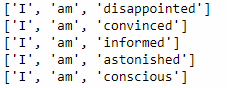

In [145]:
Image('img/grammar trigram1.png')

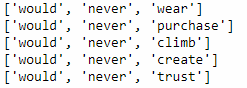

In [146]:
Image('img/grammar trigram2.png')

#### Usul solusi